## Navigate to the Correct Directory

The following code navigates to the dataprocessing directory.

In [1]:
cd ../dataprocessing

/usr/local/google/home/carverforbes/activity-recognition/location/lbs/activity/audioset/dataprocessing


## Call the Import Statements

The following code imports the necessary code to run the code in the rest of this notebook.

In [2]:
# import statements
import audio_processing as ap

import functools
import os
import sys
import datetime
import gc

from absl import logging
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import sklearn

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


## Feature Extraction
Configure the following parameters to extract the desired features from a specified csv file to a specific destination directory.

In [3]:
# set logging to print logging.INFO logs
logging.set_verbosity(logging.INFO)

In [4]:
# arguments for audio_processing
src_dir = 'example_src_dir'
dest_dir = 'example_dest_dir'
filename = 'gunshot_50_50'
labels = ['Gunshot, gunfire']
available_features = ['chroma_stft',
                       'chroma_cqt',
                       'chroma_cens',
                       'melspectrogram',
                       'mfcc',
                       'rms',
                       'spectral_centroid',
                       'spectral_bandwidth',
                       'spectral_contrast',
                       'spectral_flatness',
                       'spectral_rolloff',
                       'poly_features',
                       'tonnetz',
                       'zero_crossing_rate']
features_to_extract = ['melspectrogram']
last_features = None
redo = False

In [5]:
# Import the dataset as a pandas DataFrame object.
features = '_'.join(features_to_extract)
csv_path = os.path.join(dest_dir, filename + '_' + features + '.csv')
features_changed = last_features is None or features_to_extract != last_features
last_features = features_to_extract
df = ap.output_df(src_dir, dest_dir, filename, labels, features_to_extract, redo)

INFO:absl:The set has 13420 examples
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:a

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Already Downloaded
INFO:absl:Alre

INFO:absl:(127, 51.418807)
INFO:absl:extracted features
INFO:absl:(128, 51.679337)
INFO:absl:extracted features
INFO:absl:(129, 51.94831)
INFO:absl:extracted features
INFO:absl:(130, 52.331082)
INFO:absl:extracted features
INFO:absl:(131, 52.636802)
INFO:absl:extracted features
INFO:absl:(132, 52.909154)
INFO:absl:extracted features
INFO:absl:(133, 53.195282)
INFO:absl:extracted features
INFO:absl:(134, 53.473961)
INFO:absl:extracted features
INFO:absl:(135, 53.718168)
INFO:absl:extracted features
INFO:absl:(136, 54.05352)
INFO:absl:extracted features
INFO:absl:(137, 54.358133)
INFO:absl:extracted features
INFO:absl:(138, 54.677969)
INFO:absl:extracted features
INFO:absl:(139, 54.909607)
INFO:absl:extracted features
INFO:absl:(140, 55.187185)
INFO:absl:extracted features
INFO:absl:(141, 55.47488)
INFO:absl:extracted features
INFO:absl:(142, 55.790883)
INFO:absl:extracted features
INFO:absl:(143, 56.077744)
INFO:absl:extracted features
INFO:absl:(144, 56.303178)
INFO:absl:extracted feat

INFO:absl:(274, 94.485684)
INFO:absl:extracted features
INFO:absl:(275, 94.75737)
INFO:absl:extracted features
INFO:absl:(276, 95.027069)
INFO:absl:extracted features
INFO:absl:(277, 95.293606)
INFO:absl:extracted features
INFO:absl:(278, 95.480265)
INFO:absl:extracted features
INFO:absl:(279, 95.735523)
INFO:absl:extracted features
INFO:absl:(280, 96.013252)
INFO:absl:extracted features
INFO:absl:(281, 96.302978)
INFO:absl:extracted features
INFO:absl:(282, 96.596787)
INFO:absl:extracted features
INFO:absl:(283, 96.831662)
INFO:absl:extracted features
INFO:absl:(284, 97.106734)
INFO:absl:extracted features
INFO:absl:(285, 97.566599)
INFO:absl:extracted features
INFO:absl:(286, 97.836067)
INFO:absl:extracted features
INFO:absl:(287, 98.22033)
INFO:absl:extracted features
INFO:absl:(288, 98.440027)
INFO:absl:extracted features
INFO:absl:(289, 98.755474)
INFO:absl:extracted features
INFO:absl:(290, 99.044048)
INFO:absl:extracted features
INFO:absl:(291, 99.31308)
INFO:absl:extracted feat

INFO:absl:extracted features
INFO:absl:(419, 135.205576)
INFO:absl:extracted features
INFO:absl:(420, 135.559386)
INFO:absl:extracted features
INFO:absl:(421, 135.798284)
INFO:absl:extracted features
INFO:absl:(422, 136.044251)
INFO:absl:extracted features
INFO:absl:(423, 136.284261)
INFO:absl:extracted features
INFO:absl:(424, 136.572503)
INFO:absl:extracted features
INFO:absl:(425, 136.835425)
INFO:absl:extracted features
INFO:absl:(426, 137.105152)
INFO:absl:extracted features
INFO:absl:(427, 137.430581)
INFO:absl:extracted features
INFO:absl:(428, 137.691679)
INFO:absl:extracted features
INFO:absl:(429, 137.916503)
INFO:absl:extracted features
INFO:absl:(430, 138.154292)
INFO:absl:extracted features
INFO:absl:(431, 138.404172)
INFO:absl:extracted features
INFO:absl:(432, 138.620215)
INFO:absl:extracted features
INFO:absl:(433, 138.988843)
INFO:absl:extracted features
INFO:absl:(434, 139.296637)
INFO:absl:extracted features
INFO:absl:(435, 139.545557)
INFO:absl:extracted features
IN

INFO:absl:(563, 176.037106)
INFO:absl:extracted features
INFO:absl:(564, 176.263612)
INFO:absl:extracted features
INFO:absl:(565, 176.654692)
INFO:absl:extracted features
INFO:absl:(566, 176.879435)
INFO:absl:extracted features
INFO:absl:(567, 177.158589)
INFO:absl:extracted features
INFO:absl:(568, 177.45121)
INFO:absl:extracted features
INFO:absl:(569, 177.783458)
INFO:absl:extracted features
INFO:absl:(570, 178.141418)
INFO:absl:extracted features
INFO:absl:(571, 178.413311)
INFO:absl:extracted features
INFO:absl:(572, 178.646045)
INFO:absl:extracted features
INFO:absl:(573, 178.9096)
INFO:absl:extracted features
INFO:absl:(574, 179.285216)
INFO:absl:extracted features
INFO:absl:(575, 179.615169)
INFO:absl:extracted features
INFO:absl:(576, 179.901133)
INFO:absl:extracted features
INFO:absl:(577, 180.18898)
INFO:absl:extracted features
INFO:absl:(578, 180.50549)
INFO:absl:extracted features
INFO:absl:(579, 180.750043)
INFO:absl:extracted features
INFO:absl:(580, 181.037171)
INFO:abs

INFO:absl:extracted features
INFO:absl:(708, 219.009161)
INFO:absl:extracted features
INFO:absl:(709, 219.289676)
INFO:absl:extracted features
INFO:absl:(710, 219.640154)
INFO:absl:extracted features
INFO:absl:(711, 219.934651)
INFO:absl:extracted features
INFO:absl:(712, 220.166052)
INFO:absl:extracted features
INFO:absl:(713, 220.511403)
INFO:absl:extracted features
INFO:absl:(714, 220.723293)
INFO:absl:extracted features
INFO:absl:(715, 220.982003)
INFO:absl:extracted features
INFO:absl:(716, 221.337328)
INFO:absl:extracted features
INFO:absl:(717, 221.60669)
INFO:absl:extracted features
INFO:absl:(718, 221.900179)
INFO:absl:extracted features
INFO:absl:(719, 222.173488)
INFO:absl:extracted features
INFO:absl:(720, 222.506847)
INFO:absl:extracted features
INFO:absl:(721, 223.009072)
INFO:absl:extracted features
INFO:absl:(722, 223.27208)
INFO:absl:extracted features
INFO:absl:(723, 223.514227)
INFO:absl:extracted features
INFO:absl:(724, 223.836309)
INFO:absl:extracted features
INFO

INFO:absl:extracted features
INFO:absl:(852, 264.331205)
INFO:absl:extracted features
INFO:absl:(853, 264.640091)
INFO:absl:extracted features
INFO:absl:(854, 264.88881)
INFO:absl:extracted features
INFO:absl:(855, 265.379773)
INFO:absl:extracted features
INFO:absl:(856, 265.73515)
INFO:absl:extracted features
INFO:absl:(857, 266.207168)
INFO:absl:extracted features
INFO:absl:(858, 266.514102)
INFO:absl:extracted features
INFO:absl:(859, 266.755296)
INFO:absl:extracted features
INFO:absl:(860, 267.020273)
INFO:absl:extracted features
INFO:absl:(861, 267.40833)
INFO:absl:extracted features
INFO:absl:(862, 267.713689)
INFO:absl:extracted features
INFO:absl:(863, 267.940593)
INFO:absl:extracted features
INFO:absl:(864, 268.240076)
INFO:absl:extracted features
INFO:absl:(865, 268.539332)
INFO:absl:extracted features
INFO:absl:(866, 268.875679)
INFO:absl:extracted features
INFO:absl:(867, 269.201458)
INFO:absl:extracted features
INFO:absl:(868, 269.543031)
INFO:absl:extracted features
INFO:

INFO:absl:(996, 310.119152)
INFO:absl:extracted features
INFO:absl:(997, 310.466935)
INFO:absl:extracted features
INFO:absl:(998, 310.698521)
INFO:absl:extracted features
INFO:absl:(999, 311.032289)
INFO:absl:extracted features
INFO:absl:(1000, 311.30153)
INFO:absl:extracted features
INFO:absl:(1001, 311.496356)
INFO:absl:extracted features
INFO:absl:(1002, 311.891391)
INFO:absl:extracted features
INFO:absl:(1003, 312.320208)
INFO:absl:extracted features
INFO:absl:(1004, 312.620065)
INFO:absl:extracted features
INFO:absl:(1005, 312.925703)
INFO:absl:extracted features
INFO:absl:(1006, 313.226891)
INFO:absl:extracted features
INFO:absl:(1007, 313.445852)
INFO:absl:extracted features
INFO:absl:(1008, 313.873611)
INFO:absl:extracted features
INFO:absl:(1009, 314.137385)
INFO:absl:extracted features
INFO:absl:(1010, 314.51088)
INFO:absl:extracted features
INFO:absl:(1011, 314.7977)
INFO:absl:extracted features
INFO:absl:(1012, 315.135908)
INFO:absl:extracted features
INFO:absl:(1013, 315.4

INFO:absl:extracted features
INFO:absl:(1138, 356.09141)
INFO:absl:extracted features
INFO:absl:(1139, 356.409177)
INFO:absl:extracted features
INFO:absl:(1140, 356.857893)
INFO:absl:extracted features
INFO:absl:(1141, 357.058226)
INFO:absl:extracted features
INFO:absl:(1142, 357.461357)
INFO:absl:extracted features
INFO:absl:(1143, 357.7875)
INFO:absl:extracted features
INFO:absl:(1144, 358.122634)
INFO:absl:extracted features
INFO:absl:(1145, 358.450098)
INFO:absl:extracted features
INFO:absl:(1146, 358.857121)
INFO:absl:extracted features
INFO:absl:(1147, 359.211496)
INFO:absl:extracted features
INFO:absl:(1148, 359.483326)
INFO:absl:extracted features
INFO:absl:(1149, 359.805582)
INFO:absl:extracted features
INFO:absl:(1150, 360.105299)
INFO:absl:extracted features
INFO:absl:(1151, 360.347024)
INFO:absl:extracted features
INFO:absl:(1152, 360.667682)
INFO:absl:extracted features
INFO:absl:(1153, 360.988667)
INFO:absl:extracted features
INFO:absl:(1154, 361.232322)
INFO:absl:extract

INFO:absl:(1279, 400.617873)
INFO:absl:extracted features
INFO:absl:(1280, 400.922522)
INFO:absl:extracted features
INFO:absl:(1281, 401.235171)
INFO:absl:extracted features
INFO:absl:(1282, 401.439707)
INFO:absl:extracted features
INFO:absl:(1283, 401.679585)
INFO:absl:extracted features
INFO:absl:(1284, 401.970483)
INFO:absl:extracted features
INFO:absl:(1285, 402.202315)
INFO:absl:extracted features
INFO:absl:(1286, 402.486927)
INFO:absl:extracted features
INFO:absl:(1287, 402.710419)
INFO:absl:extracted features
INFO:absl:(1288, 403.099468)
INFO:absl:extracted features
INFO:absl:(1289, 403.390419)
INFO:absl:extracted features
INFO:absl:(1290, 403.775754)
INFO:absl:extracted features
INFO:absl:(1291, 404.073208)
INFO:absl:extracted features
INFO:absl:(1292, 404.364386)
INFO:absl:extracted features
INFO:absl:(1293, 404.610396)
INFO:absl:extracted features
INFO:absl:(1294, 405.04428)
INFO:absl:extracted features
INFO:absl:(1295, 405.209434)
INFO:absl:extracted features
INFO:absl:(1296

INFO:absl:(1421, 440.824388)
INFO:absl:extracted features
INFO:absl:(1422, 441.103557)
INFO:absl:extracted features
INFO:absl:(1423, 441.472004)
INFO:absl:extracted features
INFO:absl:(1424, 441.796298)
INFO:absl:extracted features
INFO:absl:(1425, 442.046054)
INFO:absl:extracted features
INFO:absl:(1426, 442.389388)
INFO:absl:extracted features
INFO:absl:(1427, 442.688052)
INFO:absl:extracted features
INFO:absl:(1428, 442.976576)
INFO:absl:extracted features
INFO:absl:(1429, 443.202535)
INFO:absl:extracted features
INFO:absl:(1430, 443.577039)
INFO:absl:extracted features
INFO:absl:(1431, 443.828231)
INFO:absl:extracted features
INFO:absl:(1432, 444.073506)
INFO:absl:extracted features
INFO:absl:(1433, 444.474442)
INFO:absl:extracted features
INFO:absl:(1434, 444.742302)
INFO:absl:extracted features
INFO:absl:(1435, 445.130245)
INFO:absl:extracted features
INFO:absl:(1436, 445.455991)
INFO:absl:extracted features
INFO:absl:(1437, 445.811451)
INFO:absl:extracted features
INFO:absl:(143

INFO:absl:extracted features
INFO:absl:(1563, 482.585306)
INFO:absl:extracted features
INFO:absl:(1564, 482.833988)
INFO:absl:extracted features
INFO:absl:(1565, 483.034822)
INFO:absl:extracted features
INFO:absl:(1566, 483.289423)
INFO:absl:extracted features
INFO:absl:(1567, 483.515329)
INFO:absl:extracted features
INFO:absl:(1568, 483.909955)
INFO:absl:extracted features
INFO:absl:(1569, 484.115849)
INFO:absl:extracted features
INFO:absl:(1570, 484.35758)
INFO:absl:extracted features
INFO:absl:(1571, 484.679173)
INFO:absl:extracted features
INFO:absl:(1572, 484.938061)
INFO:absl:extracted features
INFO:absl:(1573, 485.252909)
INFO:absl:extracted features
INFO:absl:(1574, 485.607809)
INFO:absl:extracted features
INFO:absl:(1575, 485.929423)
INFO:absl:extracted features
INFO:absl:(1576, 486.332491)
INFO:absl:extracted features
INFO:absl:(1577, 486.585917)
INFO:absl:extracted features
INFO:absl:(1578, 486.932948)
INFO:absl:extracted features
INFO:absl:(1579, 487.202677)
INFO:absl:extra

INFO:absl:extracted features
INFO:absl:(1705, 522.604267)
INFO:absl:extracted features
INFO:absl:(1706, 522.81208)
INFO:absl:extracted features
INFO:absl:(1707, 523.16015)
INFO:absl:extracted features
INFO:absl:(1708, 523.481685)
INFO:absl:extracted features
INFO:absl:(1709, 523.729242)
INFO:absl:extracted features
INFO:absl:(1710, 524.041716)
INFO:absl:extracted features
INFO:absl:(1711, 524.283866)
INFO:absl:extracted features
INFO:absl:(1712, 524.519035)
INFO:absl:extracted features
INFO:absl:(1713, 524.782422)
INFO:absl:extracted features
INFO:absl:(1714, 525.0557)
INFO:absl:extracted features
INFO:absl:(1715, 525.348169)
INFO:absl:extracted features
INFO:absl:(1716, 525.629907)
INFO:absl:extracted features
INFO:absl:(1717, 525.935398)
INFO:absl:extracted features
INFO:absl:(1718, 526.212312)
INFO:absl:extracted features
INFO:absl:(1719, 526.461308)
INFO:absl:extracted features
INFO:absl:(1720, 526.789316)
INFO:absl:extracted features
INFO:absl:(1721, 527.081959)
INFO:absl:extracte

INFO:absl:extracted features
INFO:absl:(1847, 566.72126)
INFO:absl:extracted features
INFO:absl:(1848, 567.135175)
INFO:absl:extracted features
INFO:absl:(1849, 567.371843)
INFO:absl:extracted features
INFO:absl:(1850, 567.658378)
INFO:absl:extracted features
INFO:absl:(1851, 567.933145)
INFO:absl:extracted features
INFO:absl:(1852, 568.321084)
INFO:absl:extracted features
INFO:absl:(1853, 568.648331)
INFO:absl:extracted features
INFO:absl:(1854, 568.885956)
INFO:absl:extracted features
INFO:absl:(1855, 569.242711)
INFO:absl:extracted features
INFO:absl:(1856, 569.576427)
INFO:absl:extracted features
INFO:absl:(1857, 569.844159)
INFO:absl:extracted features
INFO:absl:(1858, 570.078362)
INFO:absl:extracted features
INFO:absl:(1859, 570.320844)
INFO:absl:extracted features
INFO:absl:(1860, 570.683316)
INFO:absl:extracted features
INFO:absl:(1861, 571.109791)
INFO:absl:extracted features
INFO:absl:(1862, 571.353612)
INFO:absl:extracted features
INFO:absl:(1863, 571.594132)
INFO:absl:extra

INFO:absl:(1988, 615.447421)
INFO:absl:extracted features
INFO:absl:(1989, 615.808394)
INFO:absl:extracted features
INFO:absl:(1990, 616.137894)
INFO:absl:extracted features
INFO:absl:(1991, 616.422332)
INFO:absl:extracted features
INFO:absl:(1992, 616.754252)
INFO:absl:extracted features
INFO:absl:(1993, 617.02429)
INFO:absl:extracted features
INFO:absl:(1994, 617.325815)
INFO:absl:extracted features
INFO:absl:(1995, 617.618378)
INFO:absl:extracted features
INFO:absl:(1996, 617.924563)
INFO:absl:extracted features
INFO:absl:(1997, 618.267905)
INFO:absl:extracted features
INFO:absl:(1998, 618.552724)
INFO:absl:extracted features
INFO:absl:(1999, 618.825656)
INFO:absl:extracted features
INFO:absl:(2000, 619.12101)
INFO:absl:extracted features
INFO:absl:(2001, 619.532723)
INFO:absl:extracted features
INFO:absl:(2002, 619.896941)
INFO:absl:extracted features
INFO:absl:(2003, 620.294513)
INFO:absl:extracted features
INFO:absl:(2004, 620.566509)
INFO:absl:extracted features
INFO:absl:(2005,

INFO:absl:extracted features
INFO:absl:(2130, 660.703732)
INFO:absl:extracted features
INFO:absl:(2131, 661.034915)
INFO:absl:extracted features
INFO:absl:(2132, 661.27407)
INFO:absl:extracted features
INFO:absl:(2133, 661.554216)
INFO:absl:extracted features
INFO:absl:(2134, 661.92316)
INFO:absl:extracted features
INFO:absl:(2135, 662.17202)
INFO:absl:extracted features
INFO:absl:(2136, 662.457419)
INFO:absl:extracted features
INFO:absl:(2137, 662.705884)
INFO:absl:extracted features
INFO:absl:(2138, 662.817316)
INFO:absl:extracted features
INFO:absl:(2139, 663.18304)
INFO:absl:extracted features
INFO:absl:(2140, 663.48552)
INFO:absl:extracted features
INFO:absl:(2141, 663.822444)
INFO:absl:extracted features
INFO:absl:(2142, 664.137442)
INFO:absl:extracted features
INFO:absl:(2143, 664.492208)
INFO:absl:extracted features
INFO:absl:(2144, 664.897847)
INFO:absl:extracted features
INFO:absl:(2145, 665.196572)
INFO:absl:extracted features
INFO:absl:(2146, 665.476423)
INFO:absl:extracted

INFO:absl:extracted features
INFO:absl:(2272, 706.9153)
INFO:absl:extracted features
INFO:absl:(2273, 707.19894)
INFO:absl:extracted features
INFO:absl:(2274, 707.51584)
INFO:absl:extracted features
INFO:absl:(2275, 707.690473)
INFO:absl:extracted features
INFO:absl:(2276, 708.188573)
INFO:absl:extracted features
INFO:absl:(2277, 708.480931)
INFO:absl:extracted features
INFO:absl:(2278, 708.711219)
INFO:absl:extracted features
INFO:absl:(2279, 709.05019)
INFO:absl:extracted features
INFO:absl:(2280, 709.328901)
INFO:absl:extracted features
INFO:absl:(2281, 709.628019)
INFO:absl:extracted features
INFO:absl:(2282, 710.025673)
INFO:absl:extracted features
INFO:absl:(2283, 710.278264)
INFO:absl:extracted features
INFO:absl:(2284, 710.540853)
INFO:absl:extracted features
INFO:absl:(2285, 710.772745)
INFO:absl:extracted features
INFO:absl:(2286, 711.090425)
INFO:absl:extracted features
INFO:absl:(2287, 711.362306)
INFO:absl:extracted features
INFO:absl:(2288, 711.697091)
INFO:absl:extracted

INFO:absl:extracted features
INFO:absl:(2413, 752.084597)
INFO:absl:extracted features
INFO:absl:(2414, 752.376337)
INFO:absl:extracted features
INFO:absl:(2415, 752.765923)
INFO:absl:extracted features
INFO:absl:(2416, 753.099444)
INFO:absl:extracted features
INFO:absl:(2417, 753.413277)
INFO:absl:extracted features
INFO:absl:(2418, 753.700266)
INFO:absl:extracted features
INFO:absl:(2419, 753.928977)
INFO:absl:extracted features
INFO:absl:(2420, 754.393247)
INFO:absl:extracted features
INFO:absl:(2421, 754.705986)
INFO:absl:extracted features
INFO:absl:(2422, 754.974493)
INFO:absl:extracted features
INFO:absl:(2423, 755.302665)
INFO:absl:extracted features
INFO:absl:(2424, 755.604853)
INFO:absl:extracted features
INFO:absl:(2425, 755.885803)
INFO:absl:extracted features
INFO:absl:(2426, 756.200423)
INFO:absl:extracted features
INFO:absl:(2427, 756.429874)
INFO:absl:extracted features
INFO:absl:(2428, 756.750583)
INFO:absl:extracted features
INFO:absl:(2429, 757.002913)
INFO:absl:extr

INFO:absl:(2554, 796.146044)
INFO:absl:extracted features
INFO:absl:(2555, 796.553179)
INFO:absl:extracted features
INFO:absl:(2556, 796.876063)
INFO:absl:extracted features
INFO:absl:(2557, 797.189514)
INFO:absl:extracted features
INFO:absl:(2558, 797.507946)
INFO:absl:extracted features
INFO:absl:(2559, 797.825212)
INFO:absl:extracted features
INFO:absl:(2560, 798.148388)
INFO:absl:extracted features
INFO:absl:(2561, 798.486537)
INFO:absl:extracted features
INFO:absl:(2562, 798.933992)
INFO:absl:extracted features
INFO:absl:(2563, 799.207803)
INFO:absl:extracted features
INFO:absl:(2564, 799.603752)
INFO:absl:extracted features
INFO:absl:(2565, 799.930627)
INFO:absl:extracted features
INFO:absl:(2566, 800.298299)
INFO:absl:extracted features
INFO:absl:(2567, 800.547285)
INFO:absl:extracted features
INFO:absl:(2568, 800.904373)
INFO:absl:extracted features
INFO:absl:(2569, 801.170631)
INFO:absl:extracted features
INFO:absl:(2570, 801.405642)
INFO:absl:extracted features
INFO:absl:(257

INFO:absl:extracted features
INFO:absl:(2696, 841.059381)
INFO:absl:extracted features
INFO:absl:(2697, 841.517819)
INFO:absl:extracted features
INFO:absl:(2698, 841.741439)
INFO:absl:extracted features
INFO:absl:(2699, 842.038602)
INFO:absl:extracted features
INFO:absl:(2700, 842.502478)
INFO:absl:extracted features
INFO:absl:(2701, 842.895314)
INFO:absl:extracted features
INFO:absl:(2702, 843.090574)
INFO:absl:extracted features
INFO:absl:(2703, 843.41769)
INFO:absl:extracted features
INFO:absl:(2704, 843.707964)
INFO:absl:extracted features
INFO:absl:(2705, 843.97401)
INFO:absl:extracted features
INFO:absl:(2706, 844.295964)
INFO:absl:extracted features
INFO:absl:(2707, 844.504694)
INFO:absl:extracted features
INFO:absl:(2708, 844.73609)
INFO:absl:extracted features
INFO:absl:(2709, 845.104549)
INFO:absl:extracted features
INFO:absl:(2710, 845.365871)
INFO:absl:extracted features
INFO:absl:(2711, 845.544928)
INFO:absl:extracted features
INFO:absl:(2712, 845.748035)
INFO:absl:extract

INFO:absl:extracted features
INFO:absl:(2838, 882.277358)
INFO:absl:extracted features
INFO:absl:(2839, 882.637806)
INFO:absl:extracted features
INFO:absl:(2840, 882.788036)
INFO:absl:extracted features
INFO:absl:(2841, 883.074098)
INFO:absl:extracted features
INFO:absl:(2842, 883.445447)
INFO:absl:extracted features
INFO:absl:(2843, 883.695054)
INFO:absl:extracted features
INFO:absl:(2844, 884.038701)
INFO:absl:extracted features
INFO:absl:(2845, 884.391412)
INFO:absl:extracted features
INFO:absl:(2846, 884.744388)
INFO:absl:extracted features
INFO:absl:(2847, 885.031001)
INFO:absl:extracted features
INFO:absl:(2848, 885.330355)
INFO:absl:extracted features
INFO:absl:(2849, 885.580504)
INFO:absl:extracted features
INFO:absl:(2850, 885.978483)
INFO:absl:extracted features
INFO:absl:(2851, 886.248484)
INFO:absl:extracted features
INFO:absl:(2852, 886.503829)
INFO:absl:extracted features
INFO:absl:(2853, 886.783951)
INFO:absl:extracted features
INFO:absl:(2854, 887.082683)
INFO:absl:extr

INFO:absl:extracted features
INFO:absl:(2980, 927.473587)
INFO:absl:extracted features
INFO:absl:(2981, 927.854921)
INFO:absl:extracted features
INFO:absl:(2982, 928.098832)
INFO:absl:extracted features
INFO:absl:(2983, 928.473123)
INFO:absl:extracted features
INFO:absl:(2984, 928.806899)
INFO:absl:extracted features
INFO:absl:(2985, 929.074485)
INFO:absl:extracted features
INFO:absl:(2986, 929.427298)
INFO:absl:extracted features
INFO:absl:(2987, 929.68266)
INFO:absl:extracted features
INFO:absl:(2988, 930.080084)
INFO:absl:extracted features
INFO:absl:(2989, 930.449668)
INFO:absl:extracted features
INFO:absl:(2990, 930.851153)
INFO:absl:extracted features
INFO:absl:(2991, 931.29909)
INFO:absl:extracted features
INFO:absl:(2992, 931.606176)
INFO:absl:extracted features
INFO:absl:(2993, 931.955908)
INFO:absl:extracted features
INFO:absl:(2994, 932.201072)
INFO:absl:extracted features
INFO:absl:(2995, 932.538678)
INFO:absl:extracted features
INFO:absl:(2996, 932.893951)
INFO:absl:extrac

INFO:absl:(3121, 974.481443)
INFO:absl:extracted features
INFO:absl:(3122, 974.899008)
INFO:absl:extracted features
INFO:absl:(3123, 975.230494)
INFO:absl:extracted features
INFO:absl:(3124, 975.549725)
INFO:absl:extracted features
INFO:absl:(3125, 975.786445)
INFO:absl:extracted features
INFO:absl:(3126, 976.0082)
INFO:absl:extracted features
INFO:absl:(3127, 976.349387)
INFO:absl:extracted features
INFO:absl:(3128, 976.682962)
INFO:absl:extracted features
INFO:absl:(3129, 976.993397)
INFO:absl:extracted features
INFO:absl:(3130, 977.316118)
INFO:absl:extracted features
INFO:absl:(3131, 977.796224)
INFO:absl:extracted features
INFO:absl:(3132, 978.15239)
INFO:absl:extracted features
INFO:absl:(3133, 978.492059)
INFO:absl:extracted features
INFO:absl:(3134, 978.86216)
INFO:absl:extracted features
INFO:absl:(3135, 979.192904)
INFO:absl:extracted features
INFO:absl:(3136, 979.69949)
INFO:absl:extracted features
INFO:absl:(3137, 980.064705)
INFO:absl:extracted features
INFO:absl:(3138, 98

INFO:absl:(3262, 1019.952092)
INFO:absl:extracted features
INFO:absl:(3263, 1020.237254)
INFO:absl:extracted features
INFO:absl:(3264, 1020.550716)
INFO:absl:extracted features
INFO:absl:(3265, 1020.91579)
INFO:absl:extracted features
INFO:absl:(3266, 1021.24958)
INFO:absl:extracted features
INFO:absl:(3267, 1021.590996)
INFO:absl:extracted features
INFO:absl:(3268, 1021.932273)
INFO:absl:extracted features
INFO:absl:(3269, 1022.291801)
INFO:absl:extracted features
INFO:absl:(3270, 1022.624757)
INFO:absl:extracted features
INFO:absl:(3271, 1023.121795)
INFO:absl:extracted features
INFO:absl:(3272, 1023.545053)
INFO:absl:extracted features
INFO:absl:(3273, 1023.952253)
INFO:absl:extracted features
INFO:absl:(3274, 1024.400163)
INFO:absl:extracted features
INFO:absl:(3275, 1024.935057)
INFO:absl:extracted features
INFO:absl:(3276, 1025.366325)
INFO:absl:extracted features
INFO:absl:(3277, 1025.754224)
INFO:absl:extracted features
INFO:absl:(3278, 1026.186764)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(3402, 1063.389632)
INFO:absl:extracted features
INFO:absl:(3403, 1063.730379)
INFO:absl:extracted features
INFO:absl:(3404, 1064.028676)
INFO:absl:extracted features
INFO:absl:(3405, 1064.287033)
INFO:absl:extracted features
INFO:absl:(3406, 1064.530504)
INFO:absl:extracted features
INFO:absl:(3407, 1064.815503)
INFO:absl:extracted features
INFO:absl:(3408, 1065.098169)
INFO:absl:extracted features
INFO:absl:(3409, 1065.448712)
INFO:absl:extracted features
INFO:absl:(3410, 1065.666238)
INFO:absl:extracted features
INFO:absl:(3411, 1066.003321)
INFO:absl:extracted features
INFO:absl:(3412, 1066.301518)
INFO:absl:extracted features
INFO:absl:(3413, 1066.68174)
INFO:absl:extracted features
INFO:absl:(3414, 1066.917139)
INFO:absl:extracted features
INFO:absl:(3415, 1067.166825)
INFO:absl:extracted features
INFO:absl:(3416, 1067.508227)
INFO:absl:extracted features
INFO:absl:(3417, 1067.84063)
INFO:absl:extracted features
INFO:absl:(3418, 1068.107254)

INFO:absl:(3541, 1105.211749)
INFO:absl:extracted features
INFO:absl:(3542, 1105.530611)
INFO:absl:extracted features
INFO:absl:(3543, 1105.84447)
INFO:absl:extracted features
INFO:absl:(3544, 1106.075053)
INFO:absl:extracted features
INFO:absl:(3545, 1106.497702)
INFO:absl:extracted features
INFO:absl:(3546, 1106.842629)
INFO:absl:extracted features
INFO:absl:(3547, 1107.1931)
INFO:absl:extracted features
INFO:absl:(3548, 1107.426237)
INFO:absl:extracted features
INFO:absl:(3549, 1107.810306)
INFO:absl:extracted features
INFO:absl:(3550, 1108.056707)
INFO:absl:extracted features
INFO:absl:(3551, 1108.400151)
INFO:absl:extracted features
INFO:absl:(3552, 1108.765751)
INFO:absl:extracted features
INFO:absl:(3553, 1109.10786)
INFO:absl:extracted features
INFO:absl:(3554, 1109.418133)
INFO:absl:extracted features
INFO:absl:(3555, 1109.661031)
INFO:absl:extracted features
INFO:absl:(3556, 1110.030681)
INFO:absl:extracted features
INFO:absl:(3557, 1110.272519)
INFO:absl:extracted features
I

INFO:absl:extracted features
INFO:absl:(3681, 1150.7504)
INFO:absl:extracted features
INFO:absl:(3682, 1151.056703)
INFO:absl:extracted features
INFO:absl:(3683, 1151.362646)
INFO:absl:extracted features
INFO:absl:(3684, 1151.629667)
INFO:absl:extracted features
INFO:absl:(3685, 1151.995891)
INFO:absl:extracted features
INFO:absl:(3686, 1152.364562)
INFO:absl:extracted features
INFO:absl:(3687, 1152.592617)
INFO:absl:extracted features
INFO:absl:(3688, 1152.974767)
INFO:absl:extracted features
INFO:absl:(3689, 1153.237743)
INFO:absl:extracted features
INFO:absl:(3690, 1153.612011)
INFO:absl:extracted features
INFO:absl:(3691, 1153.9588)
INFO:absl:extracted features
INFO:absl:(3692, 1154.267121)
INFO:absl:extracted features
INFO:absl:(3693, 1154.634752)
INFO:absl:extracted features
INFO:absl:(3694, 1154.957176)
INFO:absl:extracted features
INFO:absl:(3695, 1155.355086)
INFO:absl:extracted features
INFO:absl:(3696, 1155.728321)
INFO:absl:extracted features
INFO:absl:(3697, 1156.117246)
I

INFO:absl:(3820, 1193.523062)
INFO:absl:extracted features
INFO:absl:(3821, 1193.796352)
INFO:absl:extracted features
INFO:absl:(3822, 1194.243457)
INFO:absl:extracted features
INFO:absl:(3823, 1194.503205)
INFO:absl:extracted features
INFO:absl:(3824, 1194.759506)
INFO:absl:extracted features
INFO:absl:(3825, 1195.014647)
INFO:absl:extracted features
INFO:absl:(3826, 1195.243992)
INFO:absl:extracted features
INFO:absl:(3827, 1195.604923)
INFO:absl:extracted features
INFO:absl:(3828, 1195.920112)
INFO:absl:extracted features
INFO:absl:(3829, 1196.193127)
INFO:absl:extracted features
INFO:absl:(3830, 1196.338463)
INFO:absl:extracted features
INFO:absl:(3831, 1196.608976)
INFO:absl:extracted features
INFO:absl:(3832, 1196.95678)
INFO:absl:extracted features
INFO:absl:(3833, 1197.384234)
INFO:absl:extracted features
INFO:absl:(3834, 1197.661654)
INFO:absl:extracted features
INFO:absl:(3835, 1197.968964)
INFO:absl:extracted features
INFO:absl:(3836, 1198.24574)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(3960, 1234.533338)
INFO:absl:extracted features
INFO:absl:(3961, 1234.854855)
INFO:absl:extracted features
INFO:absl:(3962, 1235.110144)
INFO:absl:extracted features
INFO:absl:(3963, 1235.346612)
INFO:absl:extracted features
INFO:absl:(3964, 1235.652291)
INFO:absl:extracted features
INFO:absl:(3965, 1235.936759)
INFO:absl:extracted features
INFO:absl:(3966, 1236.300815)
INFO:absl:extracted features
INFO:absl:(3967, 1236.670675)
INFO:absl:extracted features
INFO:absl:(3968, 1236.960207)
INFO:absl:extracted features
INFO:absl:(3969, 1237.289281)
INFO:absl:extracted features
INFO:absl:(3970, 1237.542785)
INFO:absl:extracted features
INFO:absl:(3971, 1237.978759)
INFO:absl:extracted features
INFO:absl:(3972, 1238.293679)
INFO:absl:extracted features
INFO:absl:(3973, 1238.651445)
INFO:absl:extracted features
INFO:absl:(3974, 1238.964616)
INFO:absl:extracted features
INFO:absl:(3975, 1239.21324)
INFO:absl:extracted features
INFO:absl:(3976, 1239.518265

INFO:absl:(4099, 1280.222048)
INFO:absl:extracted features
INFO:absl:(4100, 1280.504525)
INFO:absl:extracted features
INFO:absl:(4101, 1280.778367)
INFO:absl:extracted features
INFO:absl:(4102, 1281.142685)
INFO:absl:extracted features
INFO:absl:(4103, 1281.369904)
INFO:absl:extracted features
INFO:absl:(4104, 1281.618621)
INFO:absl:extracted features
INFO:absl:(4105, 1282.008219)
INFO:absl:extracted features
INFO:absl:(4106, 1282.262643)
INFO:absl:extracted features
INFO:absl:(4107, 1282.520253)
INFO:absl:extracted features
INFO:absl:(4108, 1282.819582)
INFO:absl:extracted features
INFO:absl:(4109, 1283.07281)
INFO:absl:extracted features
INFO:absl:(4110, 1283.316489)
INFO:absl:extracted features
INFO:absl:(4111, 1283.580111)
INFO:absl:extracted features
INFO:absl:(4112, 1283.887785)
INFO:absl:extracted features
INFO:absl:(4113, 1284.14058)
INFO:absl:extracted features
INFO:absl:(4114, 1284.476713)
INFO:absl:extracted features
INFO:absl:(4115, 1284.77559)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(4239, 1322.809382)
INFO:absl:extracted features
INFO:absl:(4240, 1323.200397)
INFO:absl:extracted features
INFO:absl:(4241, 1323.634812)
INFO:absl:extracted features
INFO:absl:(4242, 1323.966157)
INFO:absl:extracted features
INFO:absl:(4243, 1324.28894)
INFO:absl:extracted features
INFO:absl:(4244, 1324.606868)
INFO:absl:extracted features
INFO:absl:(4245, 1324.99664)
INFO:absl:extracted features
INFO:absl:(4246, 1325.262374)
INFO:absl:extracted features
INFO:absl:(4247, 1325.673464)
INFO:absl:extracted features
INFO:absl:(4248, 1326.081237)
INFO:absl:extracted features
INFO:absl:(4249, 1326.345383)
INFO:absl:extracted features
INFO:absl:(4250, 1326.710615)
INFO:absl:extracted features
INFO:absl:(4251, 1326.967154)
INFO:absl:extracted features
INFO:absl:(4252, 1327.248843)
INFO:absl:extracted features
INFO:absl:(4253, 1327.524063)
INFO:absl:extracted features
INFO:absl:(4254, 1327.962034)
INFO:absl:extracted features
INFO:absl:(4255, 1328.363746)

INFO:absl:(4378, 1368.125868)
INFO:absl:extracted features
INFO:absl:(4379, 1368.454128)
INFO:absl:extracted features
INFO:absl:(4380, 1368.827595)
INFO:absl:extracted features
INFO:absl:(4381, 1369.234589)
INFO:absl:extracted features
INFO:absl:(4382, 1369.583791)
INFO:absl:extracted features
INFO:absl:(4383, 1369.931078)
INFO:absl:extracted features
INFO:absl:(4384, 1370.260273)
INFO:absl:extracted features
INFO:absl:(4385, 1370.597973)
INFO:absl:extracted features
INFO:absl:(4386, 1370.901737)
INFO:absl:extracted features
INFO:absl:(4387, 1371.211864)
INFO:absl:extracted features
INFO:absl:(4388, 1371.431383)
INFO:absl:extracted features
INFO:absl:(4389, 1371.821612)
INFO:absl:extracted features
INFO:absl:(4390, 1372.166547)
INFO:absl:extracted features
INFO:absl:(4391, 1372.402981)
INFO:absl:extracted features
INFO:absl:(4392, 1372.789635)
INFO:absl:extracted features
INFO:absl:(4393, 1373.180172)
INFO:absl:extracted features
INFO:absl:(4394, 1373.430542)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(4518, 1410.93076)
INFO:absl:extracted features
INFO:absl:(4519, 1411.250458)
INFO:absl:extracted features
INFO:absl:(4520, 1411.568678)
INFO:absl:extracted features
INFO:absl:(4521, 1411.988256)
INFO:absl:extracted features
INFO:absl:(4522, 1412.398555)
INFO:absl:extracted features
INFO:absl:(4523, 1412.712801)
INFO:absl:extracted features
INFO:absl:(4524, 1413.043571)
INFO:absl:extracted features
INFO:absl:(4525, 1413.255841)
INFO:absl:extracted features
INFO:absl:(4526, 1413.514598)
INFO:absl:extracted features
INFO:absl:(4527, 1413.95708)
INFO:absl:extracted features
INFO:absl:(4528, 1414.324021)
INFO:absl:extracted features
INFO:absl:(4529, 1414.561522)
INFO:absl:extracted features
INFO:absl:(4530, 1414.845288)
INFO:absl:extracted features
INFO:absl:(4531, 1415.171565)
INFO:absl:extracted features
INFO:absl:(4532, 1415.478017)
INFO:absl:extracted features
INFO:absl:(4533, 1415.762553)
INFO:absl:extracted features
INFO:absl:(4534, 1416.059811)

INFO:absl:(4657, 1454.557075)
INFO:absl:extracted features
INFO:absl:(4658, 1454.922824)
INFO:absl:extracted features
INFO:absl:(4659, 1455.246255)
INFO:absl:extracted features
INFO:absl:(4660, 1455.649235)
INFO:absl:extracted features
INFO:absl:(4661, 1455.96403)
INFO:absl:extracted features
INFO:absl:(4662, 1456.349188)
INFO:absl:extracted features
INFO:absl:(4663, 1456.712737)
INFO:absl:extracted features
INFO:absl:(4664, 1457.02154)
INFO:absl:extracted features
INFO:absl:(4665, 1457.402538)
INFO:absl:extracted features
INFO:absl:(4666, 1457.703186)
INFO:absl:extracted features
INFO:absl:(4667, 1457.963305)
INFO:absl:extracted features
INFO:absl:(4668, 1458.247815)
INFO:absl:extracted features
INFO:absl:(4669, 1458.54588)
INFO:absl:extracted features
INFO:absl:(4670, 1458.894344)
INFO:absl:extracted features
INFO:absl:(4671, 1459.206089)
INFO:absl:extracted features
INFO:absl:(4672, 1459.511794)
INFO:absl:extracted features
INFO:absl:(4673, 1459.685529)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(4797, 1499.936523)
INFO:absl:extracted features
INFO:absl:(4798, 1500.297828)
INFO:absl:extracted features
INFO:absl:(4799, 1500.693305)
INFO:absl:extracted features
INFO:absl:(4800, 1500.958564)
INFO:absl:extracted features
INFO:absl:(4801, 1501.249443)
INFO:absl:extracted features
INFO:absl:(4802, 1501.54355)
INFO:absl:extracted features
INFO:absl:(4803, 1501.925345)
INFO:absl:extracted features
INFO:absl:(4804, 1502.332192)
INFO:absl:extracted features
INFO:absl:(4805, 1502.679518)
INFO:absl:extracted features
INFO:absl:(4806, 1502.940178)
INFO:absl:extracted features
INFO:absl:(4807, 1503.237303)
INFO:absl:extracted features
INFO:absl:(4808, 1503.51645)
INFO:absl:extracted features
INFO:absl:(4809, 1503.850685)
INFO:absl:extracted features
INFO:absl:(4810, 1504.155468)
INFO:absl:extracted features
INFO:absl:(4811, 1504.449834)
INFO:absl:extracted features
INFO:absl:(4812, 1504.78318)
INFO:absl:extracted features
INFO:absl:(4813, 1505.125586)


INFO:absl:(4936, 1545.915131)
INFO:absl:extracted features
INFO:absl:(4937, 1546.150293)
INFO:absl:extracted features
INFO:absl:(4938, 1546.496102)
INFO:absl:extracted features
INFO:absl:(4939, 1546.850967)
INFO:absl:extracted features
INFO:absl:(4940, 1547.137321)
INFO:absl:extracted features
INFO:absl:(4941, 1547.46086)
INFO:absl:extracted features
INFO:absl:(4942, 1547.824038)
INFO:absl:extracted features
INFO:absl:(4943, 1548.109852)
INFO:absl:extracted features
INFO:absl:(4944, 1548.448589)
INFO:absl:extracted features
INFO:absl:(4945, 1548.749981)
INFO:absl:extracted features
INFO:absl:(4946, 1548.905428)
INFO:absl:extracted features
INFO:absl:(4947, 1549.186736)
INFO:absl:extracted features
INFO:absl:(4948, 1549.602533)
INFO:absl:extracted features
INFO:absl:(4949, 1549.86417)
INFO:absl:extracted features
INFO:absl:(4950, 1550.280941)
INFO:absl:extracted features
INFO:absl:(4951, 1550.621246)
INFO:absl:extracted features
INFO:absl:(4952, 1550.967552)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(5076, 1591.02166)
INFO:absl:extracted features
INFO:absl:(5077, 1591.262058)
INFO:absl:extracted features
INFO:absl:(5078, 1591.566997)
INFO:absl:extracted features
INFO:absl:(5079, 1591.979426)
INFO:absl:extracted features
INFO:absl:(5080, 1592.322737)
INFO:absl:extracted features
INFO:absl:(5081, 1592.578372)
INFO:absl:extracted features
INFO:absl:(5082, 1592.880645)
INFO:absl:extracted features
INFO:absl:(5083, 1593.276568)
INFO:absl:extracted features
INFO:absl:(5084, 1593.580676)
INFO:absl:extracted features
INFO:absl:(5085, 1593.796967)
INFO:absl:extracted features
INFO:absl:(5086, 1594.025188)
INFO:absl:extracted features
INFO:absl:(5087, 1594.321299)
INFO:absl:extracted features
INFO:absl:(5088, 1594.567133)
INFO:absl:extracted features
INFO:absl:(5089, 1594.828418)
INFO:absl:extracted features
INFO:absl:(5090, 1595.109864)
INFO:absl:extracted features
INFO:absl:(5091, 1595.4354)
INFO:absl:extracted features
INFO:absl:(5092, 1595.670845)


INFO:absl:(5215, 1630.243078)
INFO:absl:extracted features
INFO:absl:(5216, 1630.5645)
INFO:absl:extracted features
INFO:absl:(5217, 1630.810348)
INFO:absl:extracted features
INFO:absl:(5218, 1631.064887)
INFO:absl:extracted features
INFO:absl:(5219, 1631.321636)
INFO:absl:extracted features
INFO:absl:(5220, 1631.732395)
INFO:absl:extracted features
INFO:absl:(5221, 1631.873727)
INFO:absl:extracted features
INFO:absl:(5222, 1632.267252)
INFO:absl:extracted features
INFO:absl:(5223, 1632.537878)
INFO:absl:extracted features
INFO:absl:(5224, 1632.823529)
INFO:absl:extracted features
INFO:absl:(5225, 1633.223326)
INFO:absl:extracted features
INFO:absl:(5226, 1633.521887)
INFO:absl:extracted features
INFO:absl:(5227, 1633.766415)
INFO:absl:extracted features
INFO:absl:(5228, 1634.080077)
INFO:absl:extracted features
INFO:absl:(5229, 1634.332607)
INFO:absl:extracted features
INFO:absl:(5230, 1634.675355)
INFO:absl:extracted features
INFO:absl:(5231, 1635.077572)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(5355, 1673.676938)
INFO:absl:extracted features
INFO:absl:(5356, 1674.038311)
INFO:absl:extracted features
INFO:absl:(5357, 1674.277442)
INFO:absl:extracted features
INFO:absl:(5358, 1674.54473)
INFO:absl:extracted features
INFO:absl:(5359, 1674.84777)
INFO:absl:extracted features
INFO:absl:(5360, 1675.097215)
INFO:absl:extracted features
INFO:absl:(5361, 1675.34234)
INFO:absl:extracted features
INFO:absl:(5362, 1675.576113)
INFO:absl:extracted features
INFO:absl:(5363, 1675.944418)
INFO:absl:extracted features
INFO:absl:(5364, 1676.223774)
INFO:absl:extracted features
INFO:absl:(5365, 1676.484554)
INFO:absl:extracted features
INFO:absl:(5366, 1676.716618)
INFO:absl:extracted features
INFO:absl:(5367, 1676.971978)
INFO:absl:extracted features
INFO:absl:(5368, 1677.269157)
INFO:absl:extracted features
INFO:absl:(5369, 1677.504747)
INFO:absl:extracted features
INFO:absl:(5370, 1677.762597)
INFO:absl:extracted features
INFO:absl:(5371, 1677.990486)


INFO:absl:(5494, 1718.513581)
INFO:absl:extracted features
INFO:absl:(5495, 1718.801301)
INFO:absl:extracted features
INFO:absl:(5496, 1719.07606)
INFO:absl:extracted features
INFO:absl:(5497, 1719.473185)
INFO:absl:extracted features
INFO:absl:(5498, 1719.745344)
INFO:absl:extracted features
INFO:absl:(5499, 1720.104508)
INFO:absl:extracted features
INFO:absl:(5500, 1720.380644)
INFO:absl:extracted features
INFO:absl:(5501, 1720.697917)
INFO:absl:extracted features
INFO:absl:(5502, 1721.080524)
INFO:absl:extracted features
INFO:absl:(5503, 1721.383383)
INFO:absl:extracted features
INFO:absl:(5504, 1721.688663)
INFO:absl:extracted features
INFO:absl:(5505, 1722.037071)
INFO:absl:extracted features
INFO:absl:(5506, 1722.349768)
INFO:absl:extracted features
INFO:absl:(5507, 1722.620774)
INFO:absl:extracted features
INFO:absl:(5508, 1722.860976)
INFO:absl:extracted features
INFO:absl:(5509, 1723.33007)
INFO:absl:extracted features
INFO:absl:(5510, 1723.574193)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(5634, 1762.742132)
INFO:absl:extracted features
INFO:absl:(5635, 1763.031109)
INFO:absl:extracted features
INFO:absl:(5636, 1763.236922)
INFO:absl:extracted features
INFO:absl:(5637, 1763.537998)
INFO:absl:extracted features
INFO:absl:(5638, 1763.782416)
INFO:absl:extracted features
INFO:absl:(5639, 1764.05426)
INFO:absl:extracted features
INFO:absl:(5640, 1764.269735)
INFO:absl:extracted features
INFO:absl:(5641, 1764.577386)
INFO:absl:extracted features
INFO:absl:(5642, 1764.802347)
INFO:absl:extracted features
INFO:absl:(5643, 1765.046345)
INFO:absl:extracted features
INFO:absl:(5644, 1765.255595)
INFO:absl:extracted features
INFO:absl:(5645, 1765.500501)
INFO:absl:extracted features
INFO:absl:(5646, 1765.748924)
INFO:absl:extracted features
INFO:absl:(5647, 1765.936905)
INFO:absl:extracted features
INFO:absl:(5648, 1766.218819)
INFO:absl:extracted features
INFO:absl:(5649, 1766.485366)
INFO:absl:extracted features
INFO:absl:(5650, 1766.808485

INFO:absl:(5773, 1803.480748)
INFO:absl:extracted features
INFO:absl:(5774, 1803.804731)
INFO:absl:extracted features
INFO:absl:(5775, 1804.069861)
INFO:absl:extracted features
INFO:absl:(5776, 1804.391437)
INFO:absl:extracted features
INFO:absl:(5777, 1804.702045)
INFO:absl:extracted features
INFO:absl:(5778, 1805.107477)
INFO:absl:extracted features
INFO:absl:(5779, 1805.551131)
INFO:absl:extracted features
INFO:absl:(5780, 1805.792388)
INFO:absl:extracted features
INFO:absl:(5781, 1806.044113)
INFO:absl:extracted features
INFO:absl:(5782, 1806.291111)
INFO:absl:extracted features
INFO:absl:(5783, 1806.517636)
INFO:absl:extracted features
INFO:absl:(5784, 1806.839559)
INFO:absl:extracted features
INFO:absl:(5785, 1807.101358)
INFO:absl:extracted features
INFO:absl:(5786, 1807.44943)
INFO:absl:extracted features
INFO:absl:(5787, 1807.748174)
INFO:absl:extracted features
INFO:absl:(5788, 1808.004265)
INFO:absl:extracted features
INFO:absl:(5789, 1808.274718)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(5913, 1843.443033)
INFO:absl:extracted features
INFO:absl:(5914, 1843.747704)
INFO:absl:extracted features
INFO:absl:(5915, 1844.04916)
INFO:absl:extracted features
INFO:absl:(5916, 1844.43387)
INFO:absl:extracted features
INFO:absl:(5917, 1844.792184)
INFO:absl:extracted features
INFO:absl:(5918, 1845.031793)
INFO:absl:extracted features
INFO:absl:(5919, 1845.374328)
INFO:absl:extracted features
INFO:absl:(5920, 1845.742856)
INFO:absl:extracted features
INFO:absl:(5921, 1845.97868)
INFO:absl:extracted features
INFO:absl:(5922, 1846.263758)
INFO:absl:extracted features
INFO:absl:(5923, 1846.513645)
INFO:absl:extracted features
INFO:absl:(5924, 1846.795114)
INFO:absl:extracted features
INFO:absl:(5925, 1847.096747)
INFO:absl:extracted features
INFO:absl:(5926, 1847.39729)
INFO:absl:extracted features
INFO:absl:(5927, 1847.709856)
INFO:absl:extracted features
INFO:absl:(5928, 1847.937323)
INFO:absl:extracted features
INFO:absl:(5929, 1848.155811)
I

INFO:absl:(6052, 1883.428297)
INFO:absl:extracted features
INFO:absl:(6053, 1883.667431)
INFO:absl:extracted features
INFO:absl:(6054, 1883.959217)
INFO:absl:extracted features
INFO:absl:(6055, 1884.233837)
INFO:absl:extracted features
INFO:absl:(6056, 1884.500036)
INFO:absl:extracted features
INFO:absl:(6057, 1884.78157)
INFO:absl:extracted features
INFO:absl:(6058, 1885.064064)
INFO:absl:extracted features
INFO:absl:(6059, 1885.298613)
INFO:absl:extracted features
INFO:absl:(6060, 1885.565506)
INFO:absl:extracted features
INFO:absl:(6061, 1885.930265)
INFO:absl:extracted features
INFO:absl:(6062, 1886.089542)
INFO:absl:extracted features
INFO:absl:(6063, 1886.416931)
INFO:absl:extracted features
INFO:absl:(6064, 1886.705684)
INFO:absl:extracted features
INFO:absl:(6065, 1886.955239)
INFO:absl:extracted features
INFO:absl:(6066, 1887.217488)
INFO:absl:extracted features
INFO:absl:(6067, 1887.550625)
INFO:absl:extracted features
INFO:absl:(6068, 1887.798809)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(6192, 1921.593685)
INFO:absl:extracted features
INFO:absl:(6193, 1921.830741)
INFO:absl:extracted features
INFO:absl:(6194, 1922.2484)
INFO:absl:extracted features
INFO:absl:(6195, 1922.660947)
INFO:absl:extracted features
INFO:absl:(6196, 1922.839419)
INFO:absl:extracted features
INFO:absl:(6197, 1923.12679)
INFO:absl:extracted features
INFO:absl:(6198, 1923.378265)
INFO:absl:extracted features
INFO:absl:(6199, 1923.745972)
INFO:absl:extracted features
INFO:absl:(6200, 1924.176474)
INFO:absl:extracted features
INFO:absl:(6201, 1924.508959)
INFO:absl:extracted features
INFO:absl:(6202, 1924.758385)
INFO:absl:extracted features
INFO:absl:(6203, 1925.030967)
INFO:absl:extracted features
INFO:absl:(6204, 1925.274322)
INFO:absl:extracted features
INFO:absl:(6205, 1925.496946)
INFO:absl:extracted features
INFO:absl:(6206, 1925.751423)
INFO:absl:extracted features
INFO:absl:(6207, 1926.081222)
INFO:absl:extracted features
INFO:absl:(6208, 1926.30951)
I

INFO:absl:(6331, 1962.170264)
INFO:absl:extracted features
INFO:absl:(6332, 1962.425148)
INFO:absl:extracted features
INFO:absl:(6333, 1962.699277)
INFO:absl:extracted features
INFO:absl:(6334, 1962.899)
INFO:absl:extracted features
INFO:absl:(6335, 1963.131613)
INFO:absl:extracted features
INFO:absl:(6336, 1963.394929)
INFO:absl:extracted features
INFO:absl:(6337, 1963.764923)
INFO:absl:extracted features
INFO:absl:(6338, 1964.052175)
INFO:absl:extracted features
INFO:absl:(6339, 1964.408362)
INFO:absl:extracted features
INFO:absl:(6340, 1964.669601)
INFO:absl:extracted features
INFO:absl:(6341, 1965.107562)
INFO:absl:extracted features
INFO:absl:(6342, 1965.355157)
INFO:absl:extracted features
INFO:absl:(6343, 1965.748159)
INFO:absl:extracted features
INFO:absl:(6344, 1966.044953)
INFO:absl:extracted features
INFO:absl:(6345, 1966.376226)
INFO:absl:extracted features
INFO:absl:(6346, 1966.717234)
INFO:absl:extracted features
INFO:absl:(6347, 1967.014533)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(6471, 2003.608113)
INFO:absl:extracted features
INFO:absl:(6472, 2003.881093)
INFO:absl:extracted features
INFO:absl:(6473, 2004.144224)
INFO:absl:extracted features
INFO:absl:(6474, 2004.389201)
INFO:absl:extracted features
INFO:absl:(6475, 2004.699104)
INFO:absl:extracted features
INFO:absl:(6476, 2004.945714)
INFO:absl:extracted features
INFO:absl:(6477, 2005.228191)
INFO:absl:extracted features
INFO:absl:(6478, 2005.450908)
INFO:absl:extracted features
INFO:absl:(6479, 2005.743867)
INFO:absl:extracted features
INFO:absl:(6480, 2005.993121)
INFO:absl:extracted features
INFO:absl:(6481, 2006.366168)
INFO:absl:extracted features
INFO:absl:(6482, 2006.688087)
INFO:absl:extracted features
INFO:absl:(6483, 2006.98475)
INFO:absl:extracted features
INFO:absl:(6484, 2007.257556)
INFO:absl:extracted features
INFO:absl:(6485, 2007.515326)
INFO:absl:extracted features
INFO:absl:(6486, 2007.748414)
INFO:absl:extracted features
INFO:absl:(6487, 2007.962778

INFO:absl:(6610, 2043.010167)
INFO:absl:extracted features
INFO:absl:(6611, 2043.310237)
INFO:absl:extracted features
INFO:absl:(6612, 2043.533746)
INFO:absl:extracted features
INFO:absl:(6613, 2043.780974)
INFO:absl:extracted features
INFO:absl:(6614, 2044.005627)
INFO:absl:extracted features
INFO:absl:(6615, 2044.37348)
INFO:absl:extracted features
INFO:absl:(6616, 2044.681191)
INFO:absl:extracted features
INFO:absl:(6617, 2044.973468)
INFO:absl:extracted features
INFO:absl:(6618, 2045.1974)
INFO:absl:extracted features
INFO:absl:(6619, 2045.471064)
INFO:absl:extracted features
INFO:absl:(6620, 2045.831905)
INFO:absl:extracted features
INFO:absl:(6621, 2046.074697)
INFO:absl:extracted features
INFO:absl:(6622, 2046.390678)
INFO:absl:extracted features
INFO:absl:(6623, 2046.608581)
INFO:absl:extracted features
INFO:absl:(6624, 2046.89273)
INFO:absl:extracted features
INFO:absl:(6625, 2047.093062)
INFO:absl:extracted features
INFO:absl:(6626, 2047.309777)
INFO:absl:extracted features
I

INFO:absl:extracted features
INFO:absl:(6750, 2083.712812)
INFO:absl:extracted features
INFO:absl:(6751, 2083.975484)
INFO:absl:extracted features
INFO:absl:(6752, 2084.311302)
INFO:absl:extracted features
INFO:absl:(6753, 2084.567282)
INFO:absl:extracted features
INFO:absl:(6754, 2084.936143)
INFO:absl:extracted features
INFO:absl:(6755, 2085.216356)
INFO:absl:extracted features
INFO:absl:(6756, 2085.473089)
INFO:absl:extracted features
INFO:absl:(6757, 2085.780364)
INFO:absl:extracted features
INFO:absl:(6758, 2086.133939)
INFO:absl:extracted features
INFO:absl:(6759, 2086.459232)
INFO:absl:extracted features
INFO:absl:(6760, 2086.767749)
INFO:absl:extracted features
INFO:absl:(6761, 2087.099259)
INFO:absl:extracted features
INFO:absl:(6762, 2087.481345)
INFO:absl:extracted features
INFO:absl:(6763, 2087.78889)
INFO:absl:extracted features
INFO:absl:(6764, 2088.028073)
INFO:absl:extracted features
INFO:absl:(6765, 2088.258387)
INFO:absl:extracted features
INFO:absl:(6766, 2088.538307

INFO:absl:(6889, 2122.586981)
INFO:absl:extracted features
INFO:absl:(6890, 2122.956255)
INFO:absl:extracted features
INFO:absl:(6891, 2123.172592)
INFO:absl:extracted features
INFO:absl:(6892, 2123.483797)
INFO:absl:extracted features
INFO:absl:(6893, 2123.834169)
INFO:absl:extracted features
INFO:absl:(6894, 2124.049531)
INFO:absl:extracted features
INFO:absl:(6895, 2124.116003)
INFO:absl:extracted features
INFO:absl:(6896, 2124.366979)
INFO:absl:extracted features
INFO:absl:(6897, 2124.667238)
INFO:absl:extracted features
INFO:absl:(6898, 2124.942274)
INFO:absl:extracted features
INFO:absl:(6899, 2125.226825)
INFO:absl:extracted features
INFO:absl:(6900, 2125.538211)
INFO:absl:extracted features
INFO:absl:(6901, 2125.764428)
INFO:absl:extracted features
INFO:absl:(6902, 2126.086494)
INFO:absl:extracted features
INFO:absl:(6903, 2126.393717)
INFO:absl:extracted features
INFO:absl:(6904, 2126.658784)
INFO:absl:extracted features
INFO:absl:(6905, 2126.971771)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(7029, 2162.412736)
INFO:absl:extracted features
INFO:absl:(7030, 2162.696991)
INFO:absl:extracted features
INFO:absl:(7031, 2162.898627)
INFO:absl:extracted features
INFO:absl:(7032, 2163.117687)
INFO:absl:extracted features
INFO:absl:(7033, 2163.340602)
INFO:absl:extracted features
INFO:absl:(7034, 2163.598521)
INFO:absl:extracted features
INFO:absl:(7035, 2163.706168)
INFO:absl:extracted features
INFO:absl:(7036, 2163.986781)
INFO:absl:extracted features
INFO:absl:(7037, 2164.271067)
INFO:absl:extracted features
INFO:absl:(7038, 2164.572577)
INFO:absl:extracted features
INFO:absl:(7039, 2164.765061)
INFO:absl:extracted features
INFO:absl:(7040, 2165.103218)
INFO:absl:extracted features
INFO:absl:(7041, 2165.337646)
INFO:absl:extracted features
INFO:absl:(7042, 2165.564564)
INFO:absl:extracted features
INFO:absl:(7043, 2165.816856)
INFO:absl:extracted features
INFO:absl:(7044, 2166.020599)
INFO:absl:extracted features
INFO:absl:(7045, 2166.24607

INFO:absl:(7168, 2202.870594)
INFO:absl:extracted features
INFO:absl:(7169, 2203.083564)
INFO:absl:extracted features
INFO:absl:(7170, 2203.362853)
INFO:absl:extracted features
INFO:absl:(7171, 2203.663989)
INFO:absl:extracted features
INFO:absl:(7172, 2204.013807)
INFO:absl:extracted features
INFO:absl:(7173, 2204.277847)
INFO:absl:extracted features
INFO:absl:(7174, 2204.512724)
INFO:absl:extracted features
INFO:absl:(7175, 2204.742308)
INFO:absl:extracted features
INFO:absl:(7176, 2205.028993)
INFO:absl:extracted features
INFO:absl:(7177, 2205.312769)
INFO:absl:extracted features
INFO:absl:(7178, 2205.53047)
INFO:absl:extracted features
INFO:absl:(7179, 2205.760555)
INFO:absl:extracted features
INFO:absl:(7180, 2205.997696)
INFO:absl:extracted features
INFO:absl:(7181, 2206.297644)
INFO:absl:extracted features
INFO:absl:(7182, 2206.569295)
INFO:absl:extracted features
INFO:absl:(7183, 2206.790162)
INFO:absl:extracted features
INFO:absl:(7184, 2207.098238)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(7308, 2241.174776)
INFO:absl:extracted features
INFO:absl:(7309, 2241.422252)
INFO:absl:extracted features
INFO:absl:(7310, 2241.671794)
INFO:absl:extracted features
INFO:absl:(7311, 2241.925626)
INFO:absl:extracted features
INFO:absl:(7312, 2242.151237)
INFO:absl:extracted features
INFO:absl:(7313, 2242.42339)
INFO:absl:extracted features
INFO:absl:(7314, 2242.730396)
INFO:absl:extracted features
INFO:absl:(7315, 2243.038871)
INFO:absl:extracted features
INFO:absl:(7316, 2243.269601)
INFO:absl:extracted features
INFO:absl:(7317, 2243.533513)
INFO:absl:extracted features
INFO:absl:(7318, 2243.814613)
INFO:absl:extracted features
INFO:absl:(7319, 2244.055803)
INFO:absl:extracted features
INFO:absl:(7320, 2244.428487)
INFO:absl:extracted features
INFO:absl:(7321, 2244.661768)
INFO:absl:extracted features
INFO:absl:(7322, 2244.902172)
INFO:absl:extracted features
INFO:absl:(7323, 2245.153852)
INFO:absl:extracted features
INFO:absl:(7324, 2245.442774

INFO:absl:(7447, 2279.113457)
INFO:absl:extracted features
INFO:absl:(7448, 2279.3039)
INFO:absl:extracted features
INFO:absl:(7449, 2279.567225)
INFO:absl:extracted features
INFO:absl:(7450, 2279.790964)
INFO:absl:extracted features
INFO:absl:(7451, 2280.014251)
INFO:absl:extracted features
INFO:absl:(7452, 2280.28068)
INFO:absl:extracted features
INFO:absl:(7453, 2280.520097)
INFO:absl:extracted features
INFO:absl:(7454, 2280.853896)
INFO:absl:extracted features
INFO:absl:(7455, 2281.290256)
INFO:absl:extracted features
INFO:absl:(7456, 2281.514726)
INFO:absl:extracted features
INFO:absl:(7457, 2281.85414)
INFO:absl:extracted features
INFO:absl:(7458, 2282.1854)
INFO:absl:extracted features
INFO:absl:(7459, 2282.555538)
INFO:absl:extracted features
INFO:absl:(7460, 2282.966682)
INFO:absl:extracted features
INFO:absl:(7461, 2283.385204)
INFO:absl:extracted features
INFO:absl:(7462, 2283.669793)
INFO:absl:extracted features
INFO:absl:(7463, 2283.938212)
INFO:absl:extracted features
INF

INFO:absl:extracted features
INFO:absl:(7587, 2322.383593)
INFO:absl:extracted features
INFO:absl:(7588, 2322.651398)
INFO:absl:extracted features
INFO:absl:(7589, 2323.066822)
INFO:absl:extracted features
INFO:absl:(7590, 2323.34851)
INFO:absl:extracted features
INFO:absl:(7591, 2323.724749)
INFO:absl:extracted features
INFO:absl:(7592, 2324.067658)
INFO:absl:extracted features
INFO:absl:(7593, 2324.361151)
INFO:absl:extracted features
INFO:absl:(7594, 2324.623132)
INFO:absl:extracted features
INFO:absl:(7595, 2324.854157)
INFO:absl:extracted features
INFO:absl:(7596, 2325.16105)
INFO:absl:extracted features
INFO:absl:(7597, 2325.387473)
INFO:absl:extracted features
INFO:absl:(7598, 2325.696208)
INFO:absl:extracted features
INFO:absl:(7599, 2326.107259)
INFO:absl:extracted features
INFO:absl:(7600, 2326.46569)
INFO:absl:extracted features
INFO:absl:(7601, 2326.733234)
INFO:absl:extracted features
INFO:absl:(7602, 2326.964499)
INFO:absl:extracted features
INFO:absl:(7603, 2327.260816)


INFO:absl:(7726, 2362.668251)
INFO:absl:extracted features
INFO:absl:(7727, 2362.908329)
INFO:absl:extracted features
INFO:absl:(7728, 2363.217631)
INFO:absl:extracted features
INFO:absl:(7729, 2363.473186)
INFO:absl:extracted features
INFO:absl:(7730, 2363.695119)
INFO:absl:extracted features
INFO:absl:(7731, 2364.141304)
INFO:absl:extracted features
INFO:absl:(7732, 2364.372893)
INFO:absl:extracted features
INFO:absl:(7733, 2364.644532)
INFO:absl:extracted features
INFO:absl:(7734, 2364.998625)
INFO:absl:extracted features
INFO:absl:(7735, 2365.239696)
INFO:absl:extracted features
INFO:absl:(7736, 2365.479803)
INFO:absl:extracted features
INFO:absl:(7737, 2365.778428)
INFO:absl:extracted features
INFO:absl:(7738, 2366.052173)
INFO:absl:extracted features
INFO:absl:(7739, 2366.285833)
INFO:absl:extracted features
INFO:absl:(7740, 2366.581839)
INFO:absl:extracted features
INFO:absl:(7741, 2366.813953)
INFO:absl:extracted features
INFO:absl:(7742, 2367.036079)
INFO:absl:extracted featur

INFO:absl:(7865, 2402.953985)
INFO:absl:extracted features
INFO:absl:(7866, 2403.284139)
INFO:absl:extracted features
INFO:absl:(7867, 2403.552045)
INFO:absl:extracted features
INFO:absl:(7868, 2403.882113)
INFO:absl:extracted features
INFO:absl:(7869, 2404.192503)
INFO:absl:extracted features
INFO:absl:(7870, 2404.521094)
INFO:absl:extracted features
INFO:absl:(7871, 2404.981769)
INFO:absl:extracted features
INFO:absl:(7872, 2405.328451)
INFO:absl:extracted features
INFO:absl:(7873, 2405.585065)
INFO:absl:extracted features
INFO:absl:(7874, 2406.009417)
INFO:absl:extracted features
INFO:absl:(7875, 2406.350323)
INFO:absl:extracted features
INFO:absl:(7876, 2406.589727)
INFO:absl:extracted features
INFO:absl:(7877, 2406.897945)
INFO:absl:extracted features
INFO:absl:(7878, 2407.208299)
INFO:absl:extracted features
INFO:absl:(7879, 2407.486687)
INFO:absl:extracted features
INFO:absl:(7880, 2407.748007)
INFO:absl:extracted features
INFO:absl:(7881, 2407.990256)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(8005, 2443.25557)
INFO:absl:extracted features
INFO:absl:(8006, 2443.587367)
INFO:absl:extracted features
INFO:absl:(8007, 2443.826706)
INFO:absl:extracted features
INFO:absl:(8008, 2444.196867)
INFO:absl:extracted features
INFO:absl:(8009, 2444.476595)
INFO:absl:extracted features
INFO:absl:(8010, 2444.719928)
INFO:absl:extracted features
INFO:absl:(8011, 2444.964246)
INFO:absl:extracted features
INFO:absl:(8012, 2445.228264)
INFO:absl:extracted features
INFO:absl:(8013, 2445.488641)
INFO:absl:extracted features
INFO:absl:(8014, 2445.943581)
INFO:absl:extracted features
INFO:absl:(8015, 2446.312917)
INFO:absl:extracted features
INFO:absl:(8016, 2446.678441)
INFO:absl:extracted features
INFO:absl:(8017, 2446.932097)
INFO:absl:extracted features
INFO:absl:(8018, 2447.248969)
INFO:absl:extracted features
INFO:absl:(8019, 2447.53213)
INFO:absl:extracted features
INFO:absl:(8020, 2447.773017)
INFO:absl:extracted features
INFO:absl:(8021, 2448.039372)

INFO:absl:(8144, 2484.03097)
INFO:absl:extracted features
INFO:absl:(8145, 2484.353542)
INFO:absl:extracted features
INFO:absl:(8146, 2484.66382)
INFO:absl:extracted features
INFO:absl:(8147, 2484.858032)
INFO:absl:extracted features
INFO:absl:(8148, 2485.137653)
INFO:absl:extracted features
INFO:absl:(8149, 2485.476803)
INFO:absl:extracted features
INFO:absl:(8150, 2485.685993)
INFO:absl:extracted features
INFO:absl:(8151, 2486.011428)
INFO:absl:extracted features
INFO:absl:(8152, 2486.268074)
INFO:absl:extracted features
INFO:absl:(8153, 2486.609621)
INFO:absl:extracted features
INFO:absl:(8154, 2486.989645)
INFO:absl:extracted features
INFO:absl:(8155, 2487.343145)
INFO:absl:extracted features
INFO:absl:(8156, 2487.644361)
INFO:absl:extracted features
INFO:absl:(8157, 2487.970896)
INFO:absl:extracted features
INFO:absl:(8158, 2488.232537)
INFO:absl:extracted features
INFO:absl:(8159, 2488.605933)
INFO:absl:extracted features
INFO:absl:(8160, 2488.940953)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(8284, 2534.137405)
INFO:absl:extracted features
INFO:absl:(8285, 2534.456642)
INFO:absl:extracted features
INFO:absl:(8286, 2534.70499)
INFO:absl:extracted features
INFO:absl:(8287, 2535.098794)
INFO:absl:extracted features
INFO:absl:(8288, 2535.436864)
INFO:absl:extracted features
INFO:absl:(8289, 2536.033869)
INFO:absl:extracted features
INFO:absl:(8290, 2536.324683)
INFO:absl:extracted features
INFO:absl:(8291, 2536.584807)
INFO:absl:extracted features
INFO:absl:(8292, 2536.959754)
INFO:absl:extracted features
INFO:absl:(8293, 2537.361489)
INFO:absl:extracted features
INFO:absl:(8294, 2537.750054)
INFO:absl:extracted features
INFO:absl:(8295, 2538.13022)
INFO:absl:extracted features
INFO:absl:(8296, 2538.32423)
INFO:absl:extracted features
INFO:absl:(8297, 2538.608392)
INFO:absl:extracted features
INFO:absl:(8298, 2539.064937)
INFO:absl:extracted features
INFO:absl:(8299, 2539.482797)
INFO:absl:extracted features
INFO:absl:(8300, 2539.771238)


INFO:absl:(8423, 2578.636341)
INFO:absl:extracted features
INFO:absl:(8424, 2579.055675)
INFO:absl:extracted features
INFO:absl:(8425, 2579.394131)
INFO:absl:extracted features
INFO:absl:(8426, 2579.695536)
INFO:absl:extracted features
INFO:absl:(8427, 2579.915217)
INFO:absl:extracted features
INFO:absl:(8428, 2580.159335)
INFO:absl:extracted features
INFO:absl:(8429, 2580.541304)
INFO:absl:extracted features
INFO:absl:(8430, 2580.811979)
INFO:absl:extracted features
INFO:absl:(8431, 2581.13725)
INFO:absl:extracted features
INFO:absl:(8432, 2581.39764)
INFO:absl:extracted features
INFO:absl:(8433, 2581.586455)
INFO:absl:extracted features
INFO:absl:(8434, 2581.832136)
INFO:absl:extracted features
INFO:absl:(8435, 2582.187885)
INFO:absl:extracted features
INFO:absl:(8436, 2582.520083)
INFO:absl:extracted features
INFO:absl:(8437, 2582.82371)
INFO:absl:extracted features
INFO:absl:(8438, 2583.085296)
INFO:absl:extracted features
INFO:absl:(8439, 2583.348272)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(8563, 2621.951422)
INFO:absl:extracted features
INFO:absl:(8564, 2622.210431)
INFO:absl:extracted features
INFO:absl:(8565, 2622.54256)
INFO:absl:extracted features
INFO:absl:(8566, 2622.8026)
INFO:absl:extracted features
INFO:absl:(8567, 2623.067254)
INFO:absl:extracted features
INFO:absl:(8568, 2623.368896)
INFO:absl:extracted features
INFO:absl:(8569, 2623.762345)
INFO:absl:extracted features
INFO:absl:(8570, 2624.105876)
INFO:absl:extracted features
INFO:absl:(8571, 2624.359647)
INFO:absl:extracted features
INFO:absl:(8572, 2624.718243)
INFO:absl:extracted features
INFO:absl:(8573, 2625.115155)
INFO:absl:extracted features
INFO:absl:(8574, 2625.467447)
INFO:absl:extracted features
INFO:absl:(8575, 2625.762838)
INFO:absl:extracted features
INFO:absl:(8576, 2626.029073)
INFO:absl:extracted features
INFO:absl:(8577, 2626.399226)
INFO:absl:extracted features
INFO:absl:(8578, 2626.805631)
INFO:absl:extracted features
INFO:absl:(8579, 2627.335946)


INFO:absl:(8702, 2665.147423)
INFO:absl:extracted features
INFO:absl:(8703, 2665.378755)
INFO:absl:extracted features
INFO:absl:(8704, 2665.680708)
INFO:absl:extracted features
INFO:absl:(8705, 2666.008783)
INFO:absl:extracted features
INFO:absl:(8706, 2666.358496)
INFO:absl:extracted features
INFO:absl:(8707, 2666.598346)
INFO:absl:extracted features
INFO:absl:(8708, 2666.869401)
INFO:absl:extracted features
INFO:absl:(8709, 2667.113555)
INFO:absl:extracted features
INFO:absl:(8710, 2667.438436)
INFO:absl:extracted features
INFO:absl:(8711, 2667.797815)
INFO:absl:extracted features
INFO:absl:(8712, 2668.118938)
INFO:absl:extracted features
INFO:absl:(8713, 2668.409664)
INFO:absl:extracted features
INFO:absl:(8714, 2668.739905)
INFO:absl:extracted features
INFO:absl:(8715, 2668.984545)
INFO:absl:extracted features
INFO:absl:(8716, 2669.35312)
INFO:absl:extracted features
INFO:absl:(8717, 2669.657409)
INFO:absl:extracted features
INFO:absl:(8718, 2669.933786)
INFO:absl:extracted feature

INFO:absl:extracted features
INFO:absl:(8842, 2708.249298)
INFO:absl:extracted features
INFO:absl:(8843, 2708.673008)
INFO:absl:extracted features
INFO:absl:(8844, 2708.959326)
INFO:absl:extracted features
INFO:absl:(8845, 2709.242552)
INFO:absl:extracted features
INFO:absl:(8846, 2709.624856)
INFO:absl:extracted features
INFO:absl:(8847, 2709.87339)
INFO:absl:extracted features
INFO:absl:(8848, 2710.142236)
INFO:absl:extracted features
INFO:absl:(8849, 2710.469206)
INFO:absl:extracted features
INFO:absl:(8850, 2710.732132)
INFO:absl:extracted features
INFO:absl:(8851, 2711.063322)
INFO:absl:extracted features
INFO:absl:(8852, 2711.396796)
INFO:absl:extracted features
INFO:absl:(8853, 2711.818737)
INFO:absl:extracted features
INFO:absl:(8854, 2712.178966)
INFO:absl:extracted features
INFO:absl:(8855, 2712.421004)
INFO:absl:extracted features
INFO:absl:(8856, 2712.752875)
INFO:absl:extracted features
INFO:absl:(8857, 2713.007986)
INFO:absl:extracted features
INFO:absl:(8858, 2713.382241

INFO:absl:(8981, 2753.149628)
INFO:absl:extracted features
INFO:absl:(8982, 2753.464775)
INFO:absl:extracted features
INFO:absl:(8983, 2753.703295)
INFO:absl:extracted features
INFO:absl:(8984, 2753.924819)
INFO:absl:extracted features
INFO:absl:(8985, 2754.304151)
INFO:absl:extracted features
INFO:absl:(8986, 2754.513654)
INFO:absl:extracted features
INFO:absl:(8987, 2754.824407)
INFO:absl:extracted features
INFO:absl:(8988, 2755.302354)
INFO:absl:extracted features
INFO:absl:(8989, 2755.563061)
INFO:absl:extracted features
INFO:absl:(8990, 2755.920705)
INFO:absl:extracted features
INFO:absl:(8991, 2756.30928)
INFO:absl:extracted features
INFO:absl:(8992, 2756.675995)
INFO:absl:extracted features
INFO:absl:(8993, 2757.040841)
INFO:absl:extracted features
INFO:absl:(8994, 2757.39935)
INFO:absl:extracted features
INFO:absl:(8995, 2757.773656)
INFO:absl:extracted features
INFO:absl:(8996, 2758.086)
INFO:absl:extracted features
INFO:absl:(8997, 2758.440538)
INFO:absl:extracted features
IN

INFO:absl:extracted features
INFO:absl:(9121, 2800.161333)
INFO:absl:extracted features
INFO:absl:(9122, 2800.460862)
INFO:absl:extracted features
INFO:absl:(9123, 2800.883758)
INFO:absl:extracted features
INFO:absl:(9124, 2801.217202)
INFO:absl:extracted features
INFO:absl:(9125, 2801.57318)
INFO:absl:extracted features
INFO:absl:(9126, 2801.947593)
INFO:absl:extracted features
INFO:absl:(9127, 2802.315757)
INFO:absl:extracted features
INFO:absl:(9128, 2802.677465)
INFO:absl:extracted features
INFO:absl:(9129, 2802.979836)
INFO:absl:extracted features
INFO:absl:(9130, 2803.358029)
INFO:absl:extracted features
INFO:absl:(9131, 2803.701241)
INFO:absl:extracted features
INFO:absl:(9132, 2804.257761)
INFO:absl:extracted features
INFO:absl:(9133, 2804.595491)
INFO:absl:extracted features
INFO:absl:(9134, 2804.87257)
INFO:absl:extracted features
INFO:absl:(9135, 2805.149835)
INFO:absl:extracted features
INFO:absl:(9136, 2805.470455)
INFO:absl:extracted features
INFO:absl:(9137, 2805.930612)

INFO:absl:(9260, 2849.282143)
INFO:absl:extracted features
INFO:absl:(9261, 2849.636237)
INFO:absl:extracted features
INFO:absl:(9262, 2849.955524)
INFO:absl:extracted features
INFO:absl:(9263, 2850.174903)
INFO:absl:extracted features
INFO:absl:(9264, 2850.469319)
INFO:absl:extracted features
INFO:absl:(9265, 2850.815968)
INFO:absl:extracted features
INFO:absl:(9266, 2851.204004)
INFO:absl:extracted features
INFO:absl:(9267, 2851.720897)
INFO:absl:extracted features
INFO:absl:(9268, 2852.162704)
INFO:absl:extracted features
INFO:absl:(9269, 2852.425598)
INFO:absl:extracted features
INFO:absl:(9270, 2852.678511)
INFO:absl:extracted features
INFO:absl:(9271, 2852.973006)
INFO:absl:extracted features
INFO:absl:(9272, 2853.312135)
INFO:absl:extracted features
INFO:absl:(9273, 2853.51759)
INFO:absl:extracted features
INFO:absl:(9274, 2853.825192)
INFO:absl:extracted features
INFO:absl:(9275, 2854.18539)
INFO:absl:extracted features
INFO:absl:(9276, 2854.566093)
INFO:absl:extracted features

INFO:absl:extracted features
INFO:absl:(9400, 2898.173432)
INFO:absl:extracted features
INFO:absl:(9401, 2898.541211)
INFO:absl:extracted features
INFO:absl:(9402, 2898.912042)
INFO:absl:extracted features
INFO:absl:(9403, 2899.27315)
INFO:absl:extracted features
INFO:absl:(9404, 2899.752089)
INFO:absl:extracted features
INFO:absl:(9405, 2900.078186)
INFO:absl:extracted features
INFO:absl:(9406, 2900.335214)
INFO:absl:extracted features
INFO:absl:(9407, 2900.717834)
INFO:absl:extracted features
INFO:absl:(9408, 2900.954705)
INFO:absl:extracted features
INFO:absl:(9409, 2901.364841)
INFO:absl:extracted features
INFO:absl:(9410, 2901.803028)
INFO:absl:extracted features
INFO:absl:(9411, 2902.109057)
INFO:absl:extracted features
INFO:absl:(9412, 2902.462457)
INFO:absl:extracted features
INFO:absl:(9413, 2902.820096)
INFO:absl:extracted features
INFO:absl:(9414, 2903.273219)
INFO:absl:extracted features
INFO:absl:(9415, 2903.587485)
INFO:absl:extracted features
INFO:absl:(9416, 2903.980322

INFO:absl:(9539, 2945.91102)
INFO:absl:extracted features
INFO:absl:(9540, 2946.208416)
INFO:absl:extracted features
INFO:absl:(9541, 2946.536048)
INFO:absl:extracted features
INFO:absl:(9542, 2946.847021)
INFO:absl:extracted features
INFO:absl:(9543, 2947.189095)
INFO:absl:extracted features
INFO:absl:(9544, 2947.581869)
INFO:absl:extracted features
INFO:absl:(9545, 2948.108334)
INFO:absl:extracted features
INFO:absl:(9546, 2948.468718)
INFO:absl:extracted features
INFO:absl:(9547, 2948.848323)
INFO:absl:extracted features
INFO:absl:(9548, 2949.101115)
INFO:absl:extracted features
INFO:absl:(9549, 2949.373115)
INFO:absl:extracted features
INFO:absl:(9550, 2949.699008)
INFO:absl:extracted features
INFO:absl:(9551, 2949.9299)
INFO:absl:extracted features
INFO:absl:(9552, 2950.158103)
INFO:absl:extracted features
INFO:absl:(9553, 2950.520978)
INFO:absl:extracted features
INFO:absl:(9554, 2950.813055)
INFO:absl:extracted features
INFO:absl:(9555, 2951.046117)
INFO:absl:extracted features


INFO:absl:extracted features
INFO:absl:(9679, 2988.215519)
INFO:absl:extracted features
INFO:absl:(9680, 2988.498611)
INFO:absl:extracted features
INFO:absl:(9681, 2988.703023)
INFO:absl:extracted features
INFO:absl:(9682, 2989.131957)
INFO:absl:extracted features
INFO:absl:(9683, 2989.438615)
INFO:absl:extracted features
INFO:absl:(9684, 2989.847168)
INFO:absl:extracted features
INFO:absl:(9685, 2990.115031)
INFO:absl:extracted features
INFO:absl:(9686, 2990.380528)
INFO:absl:extracted features
INFO:absl:(9687, 2990.677018)
INFO:absl:extracted features
INFO:absl:(9688, 2991.126146)
INFO:absl:extracted features
INFO:absl:(9689, 2991.626468)
INFO:absl:extracted features
INFO:absl:(9690, 2991.95821)
INFO:absl:extracted features
INFO:absl:(9691, 2992.28479)
INFO:absl:extracted features
INFO:absl:(9692, 2992.587011)
INFO:absl:extracted features
INFO:absl:(9693, 2992.96751)
INFO:absl:extracted features
INFO:absl:(9694, 2993.267263)
INFO:absl:extracted features
INFO:absl:(9695, 2993.569007)


INFO:absl:(9818, 3031.567504)
INFO:absl:extracted features
INFO:absl:(9819, 3031.804847)
INFO:absl:extracted features
INFO:absl:(9820, 3032.113517)
INFO:absl:extracted features
INFO:absl:(9821, 3032.479739)
INFO:absl:extracted features
INFO:absl:(9822, 3032.835081)
INFO:absl:extracted features
INFO:absl:(9823, 3033.122281)
INFO:absl:extracted features
INFO:absl:(9824, 3033.435535)
INFO:absl:extracted features
INFO:absl:(9825, 3033.778659)
INFO:absl:extracted features
INFO:absl:(9826, 3034.247913)
INFO:absl:extracted features
INFO:absl:(9827, 3034.688415)
INFO:absl:extracted features
INFO:absl:(9828, 3035.009683)
INFO:absl:extracted features
INFO:absl:(9829, 3035.427936)
INFO:absl:extracted features
INFO:absl:(9830, 3035.833603)
INFO:absl:extracted features
INFO:absl:(9831, 3036.106062)
INFO:absl:extracted features
INFO:absl:(9832, 3036.345867)
INFO:absl:extracted features
INFO:absl:(9833, 3036.611182)
INFO:absl:extracted features
INFO:absl:(9834, 3036.878327)
INFO:absl:extracted featur

INFO:absl:extracted features
INFO:absl:(9958, 3078.679379)
INFO:absl:extracted features
INFO:absl:(9959, 3079.067656)
INFO:absl:extracted features
INFO:absl:(9960, 3079.369914)
INFO:absl:extracted features
INFO:absl:(9961, 3079.690309)
INFO:absl:extracted features
INFO:absl:(9962, 3080.073728)
INFO:absl:extracted features
INFO:absl:(9963, 3080.451351)
INFO:absl:extracted features
INFO:absl:(9964, 3080.686733)
INFO:absl:extracted features
INFO:absl:(9965, 3080.993574)
INFO:absl:extracted features
INFO:absl:(9966, 3081.255223)
INFO:absl:extracted features
INFO:absl:(9967, 3081.455754)
INFO:absl:extracted features
INFO:absl:(9968, 3081.759127)
INFO:absl:extracted features
INFO:absl:(9969, 3082.153225)
INFO:absl:extracted features
INFO:absl:(9970, 3082.510352)
INFO:absl:extracted features
INFO:absl:(9971, 3082.772211)
INFO:absl:extracted features
INFO:absl:(9972, 3083.214873)
INFO:absl:extracted features
INFO:absl:(9973, 3083.631302)
INFO:absl:extracted features
INFO:absl:(9974, 3084.00672

INFO:absl:(10095, 3123.983775)
INFO:absl:extracted features
INFO:absl:(10096, 3124.22111)
INFO:absl:extracted features
INFO:absl:(10097, 3124.592447)
INFO:absl:extracted features
INFO:absl:(10098, 3124.922424)
INFO:absl:extracted features
INFO:absl:(10099, 3125.237202)
INFO:absl:extracted features
INFO:absl:(10100, 3125.521663)
INFO:absl:extracted features
INFO:absl:(10101, 3125.817227)
INFO:absl:extracted features
INFO:absl:(10102, 3126.351931)
INFO:absl:extracted features
INFO:absl:(10103, 3126.764974)
INFO:absl:extracted features
INFO:absl:(10104, 3127.290971)
INFO:absl:extracted features
INFO:absl:(10105, 3127.702346)
INFO:absl:extracted features
INFO:absl:(10106, 3128.153347)
INFO:absl:extracted features
INFO:absl:(10107, 3128.664236)
INFO:absl:extracted features
INFO:absl:(10108, 3129.115096)
INFO:absl:extracted features
INFO:absl:(10109, 3129.627659)
INFO:absl:extracted features
INFO:absl:(10110, 3130.044985)
INFO:absl:extracted features
INFO:absl:(10111, 3130.476869)
INFO:absl:

INFO:absl:(10232, 3176.886033)
INFO:absl:extracted features
INFO:absl:(10233, 3177.232183)
INFO:absl:extracted features
INFO:absl:(10234, 3177.472615)
INFO:absl:extracted features
INFO:absl:(10235, 3177.702003)
INFO:absl:extracted features
INFO:absl:(10236, 3178.092454)
INFO:absl:extracted features
INFO:absl:(10237, 3178.522398)
INFO:absl:extracted features
INFO:absl:(10238, 3178.960414)
INFO:absl:extracted features
INFO:absl:(10239, 3179.379851)
INFO:absl:extracted features
INFO:absl:(10240, 3179.716221)
INFO:absl:extracted features
INFO:absl:(10241, 3179.981627)
INFO:absl:extracted features
INFO:absl:(10242, 3180.342552)
INFO:absl:extracted features
INFO:absl:(10243, 3180.628455)
INFO:absl:extracted features
INFO:absl:(10244, 3180.921302)
INFO:absl:extracted features
INFO:absl:(10245, 3181.35748)
INFO:absl:extracted features
INFO:absl:(10246, 3181.564075)
INFO:absl:extracted features
INFO:absl:(10247, 3181.813932)
INFO:absl:extracted features
INFO:absl:(10248, 3182.17819)
INFO:absl:e

INFO:absl:(10369, 3223.115104)
INFO:absl:extracted features
INFO:absl:(10370, 3223.369825)
INFO:absl:extracted features
INFO:absl:(10371, 3223.73856)
INFO:absl:extracted features
INFO:absl:(10372, 3224.096479)
INFO:absl:extracted features
INFO:absl:(10373, 3224.702873)
INFO:absl:extracted features
INFO:absl:(10374, 3225.158947)
INFO:absl:extracted features
INFO:absl:(10375, 3225.554325)
INFO:absl:extracted features
INFO:absl:(10376, 3225.881499)
INFO:absl:extracted features
INFO:absl:(10377, 3226.195832)
INFO:absl:extracted features
INFO:absl:(10378, 3226.50407)
INFO:absl:extracted features
INFO:absl:(10379, 3226.959532)
INFO:absl:extracted features
INFO:absl:(10380, 3227.236531)
INFO:absl:extracted features
INFO:absl:(10381, 3227.533231)
INFO:absl:extracted features
INFO:absl:(10382, 3227.856925)
INFO:absl:extracted features
INFO:absl:(10383, 3228.264361)
INFO:absl:extracted features
INFO:absl:(10384, 3228.568456)
INFO:absl:extracted features
INFO:absl:(10385, 3228.84029)
INFO:absl:ex

INFO:absl:(10506, 3269.698467)
INFO:absl:extracted features
INFO:absl:(10507, 3270.120455)
INFO:absl:extracted features
INFO:absl:(10508, 3270.543054)
INFO:absl:extracted features
INFO:absl:(10509, 3270.879468)
INFO:absl:extracted features
INFO:absl:(10510, 3271.206441)
INFO:absl:extracted features
INFO:absl:(10511, 3271.680051)
INFO:absl:extracted features
INFO:absl:(10512, 3271.967195)
INFO:absl:extracted features
INFO:absl:(10513, 3272.325439)
INFO:absl:extracted features
INFO:absl:(10514, 3272.881133)
INFO:absl:extracted features
INFO:absl:(10515, 3273.208492)
INFO:absl:extracted features
INFO:absl:(10516, 3273.548991)
INFO:absl:extracted features
INFO:absl:(10517, 3273.893275)
INFO:absl:extracted features
INFO:absl:(10518, 3274.340426)
INFO:absl:extracted features
INFO:absl:(10519, 3274.673453)
INFO:absl:extracted features
INFO:absl:(10520, 3274.755795)
INFO:absl:extracted features
INFO:absl:(10521, 3275.171748)
INFO:absl:extracted features
INFO:absl:(10522, 3275.45196)
INFO:absl:

INFO:absl:(10643, 3316.697911)
INFO:absl:extracted features
INFO:absl:(10644, 3316.950203)
INFO:absl:extracted features
INFO:absl:(10645, 3317.353468)
INFO:absl:extracted features
INFO:absl:(10646, 3317.611668)
INFO:absl:extracted features
INFO:absl:(10647, 3317.842717)
INFO:absl:extracted features
INFO:absl:(10648, 3318.102318)
INFO:absl:extracted features
INFO:absl:(10649, 3318.329914)
INFO:absl:extracted features
INFO:absl:(10650, 3318.54571)
INFO:absl:extracted features
INFO:absl:(10651, 3318.851541)
INFO:absl:extracted features
INFO:absl:(10652, 3319.212793)
INFO:absl:extracted features
INFO:absl:(10653, 3319.474912)
INFO:absl:extracted features
INFO:absl:(10654, 3319.757139)
INFO:absl:extracted features
INFO:absl:(10655, 3320.147902)
INFO:absl:extracted features
INFO:absl:(10656, 3320.550466)
INFO:absl:extracted features
INFO:absl:(10657, 3320.729874)
INFO:absl:extracted features
INFO:absl:(10658, 3321.039419)
INFO:absl:extracted features
INFO:absl:(10659, 3321.475127)
INFO:absl:

INFO:absl:(10780, 3357.376879)
INFO:absl:extracted features
INFO:absl:(10781, 3357.753347)
INFO:absl:extracted features
INFO:absl:(10782, 3358.14332)
INFO:absl:extracted features
INFO:absl:(10783, 3358.551899)
INFO:absl:extracted features
INFO:absl:(10784, 3358.923413)
INFO:absl:extracted features
INFO:absl:(10785, 3359.35291)
INFO:absl:extracted features
INFO:absl:(10786, 3359.671529)
INFO:absl:extracted features
INFO:absl:(10787, 3359.90554)
INFO:absl:extracted features
INFO:absl:(10788, 3360.360469)
INFO:absl:extracted features
INFO:absl:(10789, 3360.567098)
INFO:absl:extracted features
INFO:absl:(10790, 3360.84646)
INFO:absl:extracted features
INFO:absl:(10791, 3361.116371)
INFO:absl:extracted features
INFO:absl:(10792, 3361.405513)
INFO:absl:extracted features
INFO:absl:(10793, 3361.728466)
INFO:absl:extracted features
INFO:absl:(10794, 3362.057214)
INFO:absl:extracted features
INFO:absl:(10795, 3362.284952)
INFO:absl:extracted features
INFO:absl:(10796, 3362.592884)
INFO:absl:ext

INFO:absl:(10917, 3400.997809)
INFO:absl:extracted features
INFO:absl:(10918, 3401.312741)
INFO:absl:extracted features
INFO:absl:(10919, 3401.566234)
INFO:absl:extracted features
INFO:absl:(10920, 3401.81848)
INFO:absl:extracted features
INFO:absl:(10921, 3402.153206)
INFO:absl:extracted features
INFO:absl:(10922, 3402.397598)
INFO:absl:extracted features
INFO:absl:(10923, 3402.758814)
INFO:absl:extracted features
INFO:absl:(10924, 3403.142765)
INFO:absl:extracted features
INFO:absl:(10925, 3403.480057)
INFO:absl:extracted features
INFO:absl:(10926, 3403.840035)
INFO:absl:extracted features
INFO:absl:(10927, 3404.190466)
INFO:absl:extracted features
INFO:absl:(10928, 3404.592828)
INFO:absl:extracted features
INFO:absl:(10929, 3405.01959)
INFO:absl:extracted features
INFO:absl:(10930, 3405.2802)
INFO:absl:extracted features
INFO:absl:(10931, 3405.605003)
INFO:absl:extracted features
INFO:absl:(10932, 3405.872694)
INFO:absl:extracted features
INFO:absl:(10933, 3406.18546)
INFO:absl:extr

INFO:absl:(11054, 3443.911792)
INFO:absl:extracted features
INFO:absl:(11055, 3444.23905)
INFO:absl:extracted features
INFO:absl:(11056, 3444.498086)
INFO:absl:extracted features
INFO:absl:(11057, 3444.822104)
INFO:absl:extracted features
INFO:absl:(11058, 3445.152568)
INFO:absl:extracted features
INFO:absl:(11059, 3445.403694)
INFO:absl:extracted features
INFO:absl:(11060, 3445.716278)
INFO:absl:extracted features
INFO:absl:(11061, 3445.962681)
INFO:absl:extracted features
INFO:absl:(11062, 3446.336837)
INFO:absl:extracted features
INFO:absl:(11063, 3446.630774)
INFO:absl:extracted features
INFO:absl:(11064, 3446.935094)
INFO:absl:extracted features
INFO:absl:(11065, 3447.176791)
INFO:absl:extracted features
INFO:absl:(11066, 3447.470038)
INFO:absl:extracted features
INFO:absl:(11067, 3447.85771)
INFO:absl:extracted features
INFO:absl:(11068, 3448.172053)
INFO:absl:extracted features
INFO:absl:(11069, 3448.429648)
INFO:absl:extracted features
INFO:absl:(11070, 3448.747505)
INFO:absl:e

INFO:absl:(11191, 3487.956615)
INFO:absl:extracted features
INFO:absl:(11192, 3488.320178)
INFO:absl:extracted features
INFO:absl:(11193, 3488.869533)
INFO:absl:extracted features
INFO:absl:(11194, 3489.205873)
INFO:absl:extracted features
INFO:absl:(11195, 3489.419161)
INFO:absl:extracted features
INFO:absl:(11196, 3489.773182)
INFO:absl:extracted features
INFO:absl:(11197, 3490.008744)
INFO:absl:extracted features
INFO:absl:(11198, 3490.37969)
INFO:absl:extracted features
INFO:absl:(11199, 3490.853745)
INFO:absl:extracted features
INFO:absl:(11200, 3491.12243)
INFO:absl:extracted features
INFO:absl:(11201, 3491.349203)
INFO:absl:extracted features
INFO:absl:(11202, 3491.668796)
INFO:absl:extracted features
INFO:absl:(11203, 3492.03975)
INFO:absl:extracted features
INFO:absl:(11204, 3492.4709)
INFO:absl:extracted features
INFO:absl:(11205, 3492.801301)
INFO:absl:extracted features
INFO:absl:(11206, 3493.167922)
INFO:absl:extracted features
INFO:absl:(11207, 3493.40162)
INFO:absl:extra

INFO:absl:(11328, 3532.91295)
INFO:absl:extracted features
INFO:absl:(11329, 3533.227999)
INFO:absl:extracted features
INFO:absl:(11330, 3533.600318)
INFO:absl:extracted features
INFO:absl:(11331, 3533.832028)
INFO:absl:extracted features
INFO:absl:(11332, 3534.314403)
INFO:absl:extracted features
INFO:absl:(11333, 3534.5979)
INFO:absl:extracted features
INFO:absl:(11334, 3534.920914)
INFO:absl:extracted features
INFO:absl:(11335, 3535.161365)
INFO:absl:extracted features
INFO:absl:(11336, 3535.403598)
INFO:absl:extracted features
INFO:absl:(11337, 3535.677733)
INFO:absl:extracted features
INFO:absl:(11338, 3535.884362)
INFO:absl:extracted features
INFO:absl:(11339, 3536.24632)
INFO:absl:extracted features
INFO:absl:(11340, 3536.62657)
INFO:absl:extracted features
INFO:absl:(11341, 3536.8663)
INFO:absl:extracted features
INFO:absl:(11342, 3537.342002)
INFO:absl:extracted features
INFO:absl:(11343, 3537.633399)
INFO:absl:extracted features
INFO:absl:(11344, 3537.943274)
INFO:absl:extrac

INFO:absl:(11465, 3578.407752)
INFO:absl:extracted features
INFO:absl:(11466, 3578.85176)
INFO:absl:extracted features
INFO:absl:(11467, 3579.199873)
INFO:absl:extracted features
INFO:absl:(11468, 3579.564648)
INFO:absl:extracted features
INFO:absl:(11469, 3579.814517)
INFO:absl:extracted features
INFO:absl:(11470, 3580.216594)
INFO:absl:extracted features
INFO:absl:(11471, 3580.501154)
INFO:absl:extracted features
INFO:absl:(11472, 3580.942751)
INFO:absl:extracted features
INFO:absl:(11473, 3581.369514)
INFO:absl:extracted features
INFO:absl:(11474, 3581.615233)
INFO:absl:extracted features
INFO:absl:(11475, 3581.87089)
INFO:absl:extracted features
INFO:absl:(11476, 3582.254092)
INFO:absl:extracted features
INFO:absl:(11477, 3582.512123)
INFO:absl:extracted features
INFO:absl:(11478, 3582.857657)
INFO:absl:extracted features
INFO:absl:(11479, 3583.153559)
INFO:absl:extracted features
INFO:absl:(11480, 3583.543663)
INFO:absl:extracted features
INFO:absl:(11481, 3583.969488)
INFO:absl:e

INFO:absl:(11602, 3623.982656)
INFO:absl:extracted features
INFO:absl:(11603, 3624.307217)
INFO:absl:extracted features
INFO:absl:(11604, 3624.549186)
INFO:absl:extracted features
INFO:absl:(11605, 3624.870653)
INFO:absl:extracted features
INFO:absl:(11606, 3625.110659)
INFO:absl:extracted features
INFO:absl:(11607, 3625.421862)
INFO:absl:extracted features
INFO:absl:(11608, 3625.737528)
INFO:absl:extracted features
INFO:absl:(11609, 3626.165679)
INFO:absl:extracted features
INFO:absl:(11610, 3626.610139)
INFO:absl:extracted features
INFO:absl:(11611, 3627.045946)
INFO:absl:extracted features
INFO:absl:(11612, 3627.367257)
INFO:absl:extracted features
INFO:absl:(11613, 3627.655173)
INFO:absl:extracted features
INFO:absl:(11614, 3628.028757)
INFO:absl:extracted features
INFO:absl:(11615, 3628.408408)
INFO:absl:extracted features
INFO:absl:(11616, 3628.839623)
INFO:absl:extracted features
INFO:absl:(11617, 3629.252565)
INFO:absl:extracted features
INFO:absl:(11618, 3629.559007)
INFO:absl

INFO:absl:(11739, 3666.232479)
INFO:absl:extracted features
INFO:absl:(11740, 3666.634704)
INFO:absl:extracted features
INFO:absl:(11741, 3666.861756)
INFO:absl:extracted features
INFO:absl:(11742, 3667.224412)
INFO:absl:extracted features
INFO:absl:(11743, 3667.582227)
INFO:absl:extracted features
INFO:absl:(11744, 3667.829526)
INFO:absl:extracted features
INFO:absl:(11745, 3668.144962)
INFO:absl:extracted features
INFO:absl:(11746, 3668.411239)
INFO:absl:extracted features
INFO:absl:(11747, 3668.744461)
INFO:absl:extracted features
INFO:absl:(11748, 3668.97365)
INFO:absl:extracted features
INFO:absl:(11749, 3669.274578)
INFO:absl:extracted features
INFO:absl:(11750, 3669.578047)
INFO:absl:extracted features
INFO:absl:(11751, 3669.820762)
INFO:absl:extracted features
INFO:absl:(11752, 3670.122667)
INFO:absl:extracted features
INFO:absl:(11753, 3670.367199)
INFO:absl:extracted features
INFO:absl:(11754, 3670.770819)
INFO:absl:extracted features
INFO:absl:(11755, 3671.059195)
INFO:absl:

INFO:absl:(11876, 3709.352399)
INFO:absl:extracted features
INFO:absl:(11877, 3709.713985)
INFO:absl:extracted features
INFO:absl:(11878, 3709.994715)
INFO:absl:extracted features
INFO:absl:(11879, 3710.234844)
INFO:absl:extracted features
INFO:absl:(11880, 3710.701835)
INFO:absl:extracted features
INFO:absl:(11881, 3710.954447)
INFO:absl:extracted features
INFO:absl:(11882, 3711.325594)
INFO:absl:extracted features
INFO:absl:(11883, 3711.646194)
INFO:absl:extracted features
INFO:absl:(11884, 3711.929905)
INFO:absl:extracted features
INFO:absl:(11885, 3712.223233)
INFO:absl:extracted features
INFO:absl:(11886, 3712.57405)
INFO:absl:extracted features
INFO:absl:(11887, 3712.812185)
INFO:absl:extracted features
INFO:absl:(11888, 3713.143281)
INFO:absl:extracted features
INFO:absl:(11889, 3713.444232)
INFO:absl:extracted features
INFO:absl:(11890, 3713.854538)
INFO:absl:extracted features
INFO:absl:(11891, 3714.187293)
INFO:absl:extracted features
INFO:absl:(11892, 3714.414314)
INFO:absl:

In [6]:
# print the first 5 rows of the dataframe.
df.head()

,label,melspectrogram
0,1,"[[3.4134238, 2.5367897, 2.295652, 1.9729736, 1..."
1,1,"[[0.009715517, 0.0028677727, 0.001311192, 0.00..."
2,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1,"[[0.17823805, 0.099924825, 0.043443326, 0.1058..."
4,0,"[[0.0009629534, 0.0006072721, 0.00039850635, 0..."


## Data Preprocessing

In [7]:
def fix_dataframe(dataframe):
    # temp bug fix for rows with None features
    # and rows with different number of elements per frame
    bad_rows = []
    for i in dataframe.index:
        if dataframe.melspectrogram[i] is None:
            bad_rows.append(i)
        elif dataframe.melspectrogram[i][0] is None:
            bad_rows.append(i)
        elif len(dataframe.melspectrogram[i]) != 128:
            bad_rows.append(i)
        elif len(dataframe.melspectrogram[i][0]) != 431:
            bad_rows.append(i)
    new_dataframe = dataframe.drop(bad_rows)
    return new_dataframe

In [8]:
# Shuffle the dataset/dataframe.
def shuffle_dataframe(dataframe):
    dataframe = dataframe.reindex(np.random.permutation(dataframe.index))
    return dataframe

In [9]:
def dataframe_to_x_y(dataframe):
    X = np.array(dataframe.melspectrogram.tolist(), dtype=object)
    y = np.array(dataframe.label.tolist())
    
    # Convert arrays of objects to arrays of floats.
    X = tf.keras.backend.cast_to_floatx(X)
    y = tf.keras.backend.cast_to_floatx(y)
    return X, y

In [10]:
def data_preprocessing(dataframe):
    print('tossing bad or incongruent data')
    dataframe = fix_dataframe(dataframe)
    print('shuffling dataframe')
    dataframe = shuffle_dataframe(dataframe)
    print('getting X, y from dataframe')
    X, y = dataframe_to_x_y(dataframe)
    x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state = 42)
    return x_train, y_train, x_val, y_val

In [11]:
data = data_preprocessing(df)
x_train, y_train, x_val, y_val = data

tossing bad or incongruent data
shuffling dataframe
getting X, y from dataframe


In [21]:
print(len(x_train[0]))
print(len(x_train[0][0]))
print(len(x_val[0]))
print(len(x_val[0][0]))

128
431
128
431


Enter your data preprocessing here.

## Building and Training Neural Network

In [14]:
# Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics, path, filename, list_of_hyperparameters):
    """Plot a curve of one or more classification metrics vs. epoch and save it to path."""  
    # list_of_metrics should be one of the names shown in:
    # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()
    
    if not os.path.isdir(path):
        try:
            os.mkdir(path)
        except OSError as error:
            logging.error(error)
            
    path = os.path.join(path, filename)
    
    if not os.path.isdir(path):
        try:
            os.mkdir(path)
        except OSError as error:
            logging.error(error)
        
    list_of_hyperparameters_temp = [str(item) for item in list_of_hyperparameters]
    list_of_metrics_temp = [item if isinstance(item, str) else str(item.name) for item in list_of_metrics]
    filename = '_'.join(list_of_metrics_temp) + '_' + '_'.join(list_of_hyperparameters_temp)
    path = os.path.join(path, filename + '.png')
    plt.savefig(path, bbox_inches='tight')
    
    return plt


print("Defined the plot_curve function.")

Defined the plot_curve function.


## Train 1
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [25]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()
              
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, input_shape=(128, 431, 1), activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Flatten(name='Flatten_1'))
    
    model.add(tf.keras.layers.Dense(units=20, activation=activation,
                                    kernel_regularizer=regularization(regularization_lambda),
                                    name='Hidden_1'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 127, 430, 16)      80        
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 63, 215, 16)       0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 63, 215, 16)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 62, 214, 32)       2080      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 31, 107, 32)       0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 31, 107, 32)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 106, 64)      

351/351 [==============================] - 76s 216ms/step - loss: 0.5034 - accuracy: 0.7596 - precision: 0.8788 - recall: 0.5605 - val_loss: 0.6547 - val_accuracy: 0.8060 - val_precision: 0.7706 - val_recall: 0.8248
Epoch 27/30
351/351 [==============================] - 78s 223ms/step - loss: 0.5118 - accuracy: 0.7627 - precision: 0.8789 - recall: 0.5681 - val_loss: 0.4794 - val_accuracy: 0.7280 - val_precision: 0.9107 - val_recall: 0.4545
Epoch 28/30
351/351 [==============================] - 79s 224ms/step - loss: 0.5129 - accuracy: 0.7649 - precision: 0.8789 - recall: 0.5735 - val_loss: 0.4660 - val_accuracy: 0.7503 - val_precision: 0.8998 - val_recall: 0.5158
Epoch 29/30
351/351 [==============================] - 78s 222ms/step - loss: 0.5095 - accuracy: 0.7655 - precision: 0.8788 - recall: 0.5750 - val_loss: 0.5066 - val_accuracy: 0.7928 - val_precision: 0.8668 - val_recall: 0.6505
Epoch 30/30
351/351 [==============================] - 76s 218ms/step - loss: 0.5042 - accuracy: 0.7

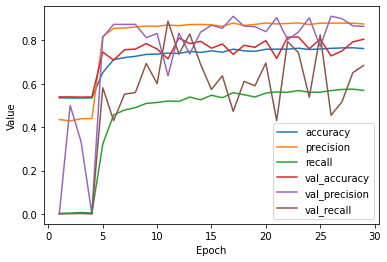

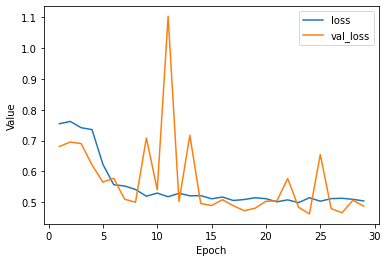

In [30]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.01
epochs = 30
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

x_train1 = x_train.reshape(x_train.shape[0], 128, 431, 1)
x_val1 = x_val.reshape(x_val.shape[0], 128, 431, 1)

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train1, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val1, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train1, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val1, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])

## Train 2
Neural Network Type:
* Input Layer: (Number of Nodes)
* Hidden Layer 1:
* Hidden Layer 2: 
* Ouput Layer: 

Hyper-parameters:
* Loss Function: 
* Activation Function: 
* Optimizer Function: 
* Learning Rate: 
* Epochs: 
* Batch_Size: 
* Classification Threshold: 
* Regularization: 
* Regularization Lambda: 

In [31]:
# Define the functions that create and train a model.
def create_model(my_learning_rate, my_metrics, optimizer, regularization, regularization_lambda):
    """Create and compile a simple classification model."""
    # Discard any pre-existing version of the model.
    model = None

    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()
              
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, input_shape=(128, 431, 1), activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2, activation=activation))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Flatten(name='Flatten_1'))
    
    model.add(tf.keras.layers.Dense(units=20, activation=activation,
                                    kernel_regularizer=regularization(regularization_lambda),
                                    name='Hidden_1'))

    # Funnel the regression value through a sigmoid function.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid,
                                  name='Output'))

    # Call the compile method to construct the layers into a model that
    # TensorFlow can execute.  Notice that we're using a different loss
    # function for classification than for regression.    
    model.compile(optimizer=optimizer(lr=my_learning_rate),                                                   
                loss=loss,
                metrics=my_metrics)

    return model        
              
def train_model(model, features, label, epochs, label_name,
                batch_size=None, my_validation_split=0.0,
                validation_data=None, shuffle=True):
    """Feed a dataset into the model in order to train it."""

    # The x parameter of tf.keras.Model.fit can be a list of arrays.
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle, validation_data=validation_data)

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch

    # Isolate the classification metric for each epoch.
    hist = pd.DataFrame(history.history)

    return epochs, hist  

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 127, 430, 16)      80        
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 63, 215, 16)       0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 63, 215, 16)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 62, 214, 32)       2080      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 31, 107, 32)       0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 31, 107, 32)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 30, 106, 64)      

Epoch 25/30
351/351 [==============================] - 76s 216ms/step - loss: 0.5517 - accuracy: 0.7506 - precision: 0.8810 - recall: 0.5362 - val_loss: 0.4756 - val_accuracy: 0.8142 - val_precision: 0.8518 - val_recall: 0.7228
Epoch 26/30
351/351 [==============================] - 77s 219ms/step - loss: 0.5170 - accuracy: 0.7422 - precision: 0.8667 - recall: 0.5266 - val_loss: 0.6044 - val_accuracy: 0.8097 - val_precision: 0.7893 - val_recall: 0.8010
Epoch 27/30
351/351 [==============================] - 80s 228ms/step - loss: 0.5465 - accuracy: 0.7490 - precision: 0.8737 - recall: 0.5382 - val_loss: 0.4669 - val_accuracy: 0.7485 - val_precision: 0.8964 - val_recall: 0.5139
Epoch 28/30
351/351 [==============================] - 76s 215ms/step - loss: 0.5797 - accuracy: 0.7422 - precision: 0.8799 - recall: 0.5161 - val_loss: 0.5564 - val_accuracy: 0.8275 - val_precision: 0.8231 - val_recall: 0.7970
Epoch 29/30
351/351 [==============================] - 77s 219ms/step - loss: 0.5080 - a

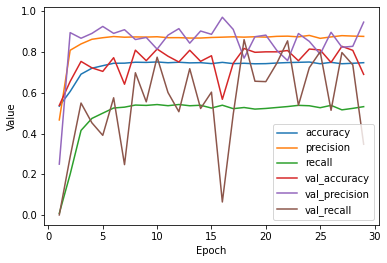

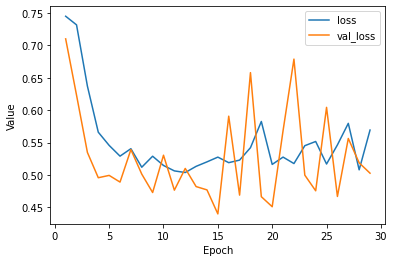

In [32]:
# The following variables are the hyperparameters.
loss = tf.keras.losses.BinaryCrossentropy()
activation = 'relu'
optimizer = tf.keras.optimizers.RMSprop
learning_rate = 0.01
epochs = 30
batch_size = 25
classification_threshold = 0.70
regularization = tf.keras.regularizers.l2
regularization_lambda = 0.001
label_name = "label"

list_of_hyperparameters = [learning_rate, epochs, batch_size,
                           classification_threshold,
                           regularization_lambda,
                           label_name]


# Here is the updated definition of METRICS:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(
          name='accuracy', threshold=classification_threshold),
      tf.keras.metrics.Precision(
          thresholds=classification_threshold, name='precision'),
      tf.keras.metrics.Recall(
          thresholds=classification_threshold, name="recall"),
]

x_train1 = x_train.reshape(x_train.shape[0], 128, 431, 1)
x_val1 = x_val.reshape(x_val.shape[0], 128, 431, 1)

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS, optimizer=optimizer, regularization=regularization, regularization_lambda=regularization_lambda)

# View the model's structure.
my_model.summary()

# Train the model on the training set.
epochs, hist = train_model(my_model, x_train1, y_train, epochs, 
                          label_name, batch_size, validation_data=(x_val1, y_val))

# Plot metrics vs. epochs
list_of_metrics_to_plot = ['accuracy', "precision", "recall", 'val_accuracy', 'val_precision', 'val_recall'] 
plot_curve(epochs, hist, list_of_metrics_to_plot, dest_dir, filename, list_of_hyperparameters)
plot_curve(epochs, hist, ['loss', 'val_loss'], dest_dir, filename, list_of_hyperparameters)

training_performance =  my_model.evaluate(x_train1, y_train, verbose=0)
print('Training Performance')
print('---------------------------------')
print('loss: ', training_performance[0])
print('accuracy: ', training_performance[1])
print('precision: ', training_performance[2])
print('recall: ', training_performance[3])
print()

validation_performance =  my_model.evaluate(x_val1, y_val, verbose=0)
print('Validation Performance')
print('---------------------------------')
print('loss: ', validation_performance[0])
print('accuracy: ', validation_performance[1])
print('precision: ', validation_performance[2])
print('recall: ', validation_performance[3])